# DNA shape features for k-mer nucleotide mutation rate prediction
## Analysis
### Zian Liu
#### Last updated: 7/5/2022

This notebook is for analyzing our models and is run after we build all the models.

## Setup

First, import libraries:

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import seaborn as sns
from joblib import dump, load, Parallel, delayed
from copy import deepcopy
from collections import Counter
from IPython.display import display
from Bio.Seq import Seq
from scipy.stats import pearsonr, spearmanr, fisher_exact, binom_test, kstest, percentileofscore, entropy
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import VarianceThreshold, f_regression
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoLarsIC, Lasso, lars_path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Print version info
import Bio
import matplotlib
import joblib
import scipy
import sklearn
print("Numpy version: ", np.__version__, "\nPandas version: ", pd.__version__, "\nMatplotlib version: ", matplotlib.__version__, 
      "\nSeaborn version: ", sns.__version__, "\nScipy version: ", scipy.__version__, "\nScikit-learn version: ", sklearn.__version__, 
      "\nBiopython version: ", Bio.__version__, "\nJoblib version: ", joblib.__version__)

Numpy version:  1.21.5 
Pandas version:  1.4.1 
Matplotlib version:  3.4.3 
Seaborn version:  0.11.2 
Scipy version:  1.7.3 
Scikit-learn version:  0.23.2 
Biopython version:  1.78 
Joblib version:  1.1.0


# Import functions from file:

In [2]:
from notebook_functions_all import *

Load the files. 

In [3]:
DF_val_join, List_value, Eff_test, Index_class, Index_class_name, Pred_1d, Pred_2d, Minmax_shape, Eff, \
    Labels_2d, Kfoldobj, Pred_2dneibr, Labels_2dneibr, Minmax_2dneibr, Var_red_neibr, \
    Pred_sc_1d, Pred_sc_2d, Labels_sc_2d, Pred_sc_3d, \
    Labels_sc_3d, Pred_sc_4d, Labels_sc_4d, Index_class_sc, \
    Pred_sc_2dneibr, Labels_sc_2dneibr, Pred_sc_3dneibr, Labels_sc_3dneibr, \
    Pred_sc_4dneibr, Labels_sc_4dneibr = load("data_intermediate/import_all_data.joblib")

/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator VarianceThreshold from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Coefficient analysis

Next, we will identify the top coefficients in our best performing models. Do this for each model, and then bin the outputs.

For comparison purposes, the coefficients are divided by the range of effectors ( max(Eff) - min(Eff) ) to ensure equal comparison.

We have done this for a few other models, but for interpretability reasons, our final analysis will only involve second order shape models.

In [4]:
# shape 2
temp_index = list(Labels_2dneibr)
alpha_list, Indices_rmL1_bin = load_L1_indices(
    "data_intermediate/Results_L1_sh2neibr.joblib", "data_intermediate/Models_L1_sh2neibr.joblib")
Model_bin_L1_02 = load("data_out/Model_sh2neibr.joblib")

DF_02_topcoefs = return_coefs_df(Model_bin_L1_02, Pred_2dneibr, Eff, Indices_rmL1_bin, temp_index, index_class=Index_class, 
                                index_class_labels=Index_class_name, save_filename="data_out/Coefs_sh2neibr.csv")
display(DF_02_topcoefs)

Class 0, Number of predictors: 629
Class 1, Number of predictors: 889
Class 2, Number of predictors: 501
Class 3, Number of predictors: 616
Class 4, Number of predictors: 770
Class 5, Number of predictors: 527
Class 6, Number of predictors: 123
Class 7, Number of predictors: 126
Class 8, Number of predictors: 175


/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


,A>C,A>G,A>T,C>A,C>G,C>T,CpG_C>A,CpG_C>G,CpG_C>T
HelT_L,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HelT_CL,0.00000,0.000000,0.000000,1.387339,0.000000,0.000000,0.000000,0.000000,0.000000
HelT_CR,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051239
HelT_R,0.00000,0.000000,0.000000,0.000000,-0.003336,0.473789,-5.473866,0.000000,0.000000
Rise_L,0.28753,0.343765,0.000000,0.463717,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
MGW_R_r*MGW_R_r,0.00000,-0.215245,0.000000,0.666864,0.000000,0.000000,-0.302775,0.000000,0.000000
MGW_R_r*EP_R_r,-0.01217,0.000000,0.000000,0.547368,0.000000,0.000000,0.000000,0.193074,-0.958992
EP_L_r*EP_L_r,0.00000,0.000000,0.000000,0.000000,0.000000,-0.254604,0.000000,0.000000,0.000000
EP_C_r*EP_C_r,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The all class, second order shape model:

In [5]:
# shape 2
Model_LRlog2 = load("data_out/Model_allclass_log.joblib")

DF_LRlog2_topcoefs = pd.DataFrame( Model_LRlog2.coef_ / (np.max(Eff) - np.min(Eff)) )
DF_LRlog2_topcoefs.index = list(Labels_2d)

DF_LRlog2_topcoefs.to_csv("data_out/Coefs_allclass.csv")
display(DF_LRlog2_topcoefs)

,0
HelT_L,-251.803952
HelT_CL,393.458267
HelT_CR,135.614898
HelT_R,173.008855
Rise_L,-35.254283
...,...
MGW_R_r*EP_R_r,-112.601758
EP_L_r*EP_L_r,169.182932
EP_L_r*EP_R_r,-0.054478
EP_C_r*EP_C_r,41.127974


Final model (a little more complicated):

In [6]:
model_info = ['sh2neibr', 'sh2neibr_sc1', 'sh2neibr_sc3', 'sh2neibr_sc4']
model_use = [3, 3, 0, 1, 1, 3, 0, 3, 3]

all_models = [load("data_intermediate/Models_L1_" + str(item) + ".joblib") for item in model_info]
results = [load("data_intermediate/Results_L1_" + str(item) + ".joblib") for item in model_info]
pred_list = [Pred_2dneibr, 
             np.concatenate((Pred_2dneibr, Pred_sc_1d), axis=1),
             np.concatenate((Pred_2dneibr, Pred_sc_3d), axis=1),
             np.concatenate((Pred_2dneibr, Pred_sc_4d), axis=1)]
labels_list = [Labels_2dneibr, np.concatenate((Labels_2dneibr, Labels_sc_2d[0:18])), 
               np.concatenate((Labels_2dneibr, Labels_sc_3d)), 
               np.concatenate((Labels_2dneibr, Labels_sc_4d))]

Indices_rmL1_binpred, alpha_list = [], []
for select in range(9):
    min_loc = np.argmin(
        [np.mean(results[model_use[select]][select][key]['test_mse']) for key in results[model_use[select]][select].keys()]
    )
    alpha_list.append( list(results[model_use[select]][select].keys())[min_loc] )
    temp_pred = pred_list[model_use[select]][Index_class==select]
    Indices_rmL1_binpred.append( all_models[model_use[select]][select][alpha_list[select]].coef_ != 0 )

Model_bin_L1_final = load("data_out/Model_final.joblib")

array_final_topcoefs = dict()
for select in range(9):
    array_final_topcoefs[select] = np.zeros(shape=np.shape(pred_list[model_use[select]][1]), dtype=float)
    array_final_topcoefs[select][Indices_rmL1_binpred[select]] = Model_bin_L1_final.model[select].coef_ / \
        ( np.max(Eff[Index_class == select]) - np.min(Eff[Index_class == select]) )
    array_final_topcoefs[select] = pd.DataFrame(array_final_topcoefs[select])
    array_final_topcoefs[select].index, array_final_topcoefs[select].columns = labels_list[model_use[select]], [Index_class_name[select]]

DF_final_topcoefs = pd.DataFrame()
for select in range(9):
    DF_final_topcoefs = DF_final_topcoefs.merge(array_final_topcoefs[select], how='outer', left_index=True, right_index=True)

# Fill NA, and then remove all-0 rows
DF_final_topcoefs = DF_final_topcoefs.fillna(0)
DF_final_topcoefs = DF_final_topcoefs[(DF_final_topcoefs.T != 0).any()]

DF_final_topcoefs.to_csv("data_out/Coefs_final.csv")
display(DF_final_topcoefs)

/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Lasso from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


,A>C,A>G,A>T,C>A,C>G,C>T,CpG_C>A,CpG_C>G,CpG_C>T
Buckle_C*Buckle_C,0.024216,0.000000,0.009238,1.232553,0.587240,0.059398,0.0,0.000000e+00,0.000000e+00
Buckle_C*Buckle_C_r,0.000000,0.000000,-0.034959,0.000000,-0.534971,0.000000,0.0,0.000000e+00,0.000000e+00
Buckle_C*EP_C_r,0.000000,0.000000,0.232340,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00
Buckle_C*EP_R,0.000000,0.000000,0.000000,0.000000,0.512894,-0.190022,0.0,0.000000e+00,0.000000e+00
Buckle_C*EP_R_r,0.000000,0.000000,0.000000,0.000000,2.459775,0.000000,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
____TT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.642204e+09,-2.045308e+10
____T_,0.003477,-0.017258,0.000000,-0.146432,0.596882,0.113464,0.0,-1.400234e+10,-2.293870e+10
_____C,0.025584,-0.012043,0.000000,0.000000,0.153798,0.004129,0.0,-1.282338e+10,-4.129047e+09
_____G,-0.014232,0.014929,0.000000,-0.049954,0.132755,-0.045939,0.0,-1.693816e+09,1.001690e+10


#### Importing data

Next, re-import the coefficients from the shape 2 model:

In [7]:
DF_final_topcoefs = pd.read_csv("data_out/Coefs_sh2neibr.csv", index_col=0)
DF_final_topcoefs = DF_final_topcoefs[(DF_final_topcoefs.T != 0).any()]

display(DF_final_topcoefs)

,A>C,A>G,A>T,C>A,C>G,C>T,CpG_C>A,CpG_C>G,CpG_C>T
HelT_CL,0.00000,0.000000,0.000000,1.387339,0.000000,0.000000,0.000000,0.000000,0.000000
HelT_CR,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051239
HelT_R,0.00000,0.000000,0.000000,0.000000,-0.003336,0.473789,-5.473866,0.000000,0.000000
Rise_L,0.28753,0.343765,0.000000,0.463717,0.000000,0.000000,0.000000,0.000000,0.000000
Rise_CR,0.00000,0.000000,0.000000,0.730196,-4.785950,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
MGW_C_r*EP_R_r,0.44413,1.430056,0.040061,-0.176225,-1.286641,0.000000,0.000000,0.000000,0.803849
MGW_R_r*MGW_R_r,0.00000,-0.215245,0.000000,0.666864,0.000000,0.000000,-0.302775,0.000000,0.000000
MGW_R_r*EP_R_r,-0.01217,0.000000,0.000000,0.547368,0.000000,0.000000,0.000000,0.193074,-0.958992
EP_L_r*EP_L_r,0.00000,0.000000,0.000000,0.000000,0.000000,-0.254604,0.000000,0.000000,0.000000


Show the R^2 values (explained variance) when fitting L1 models:

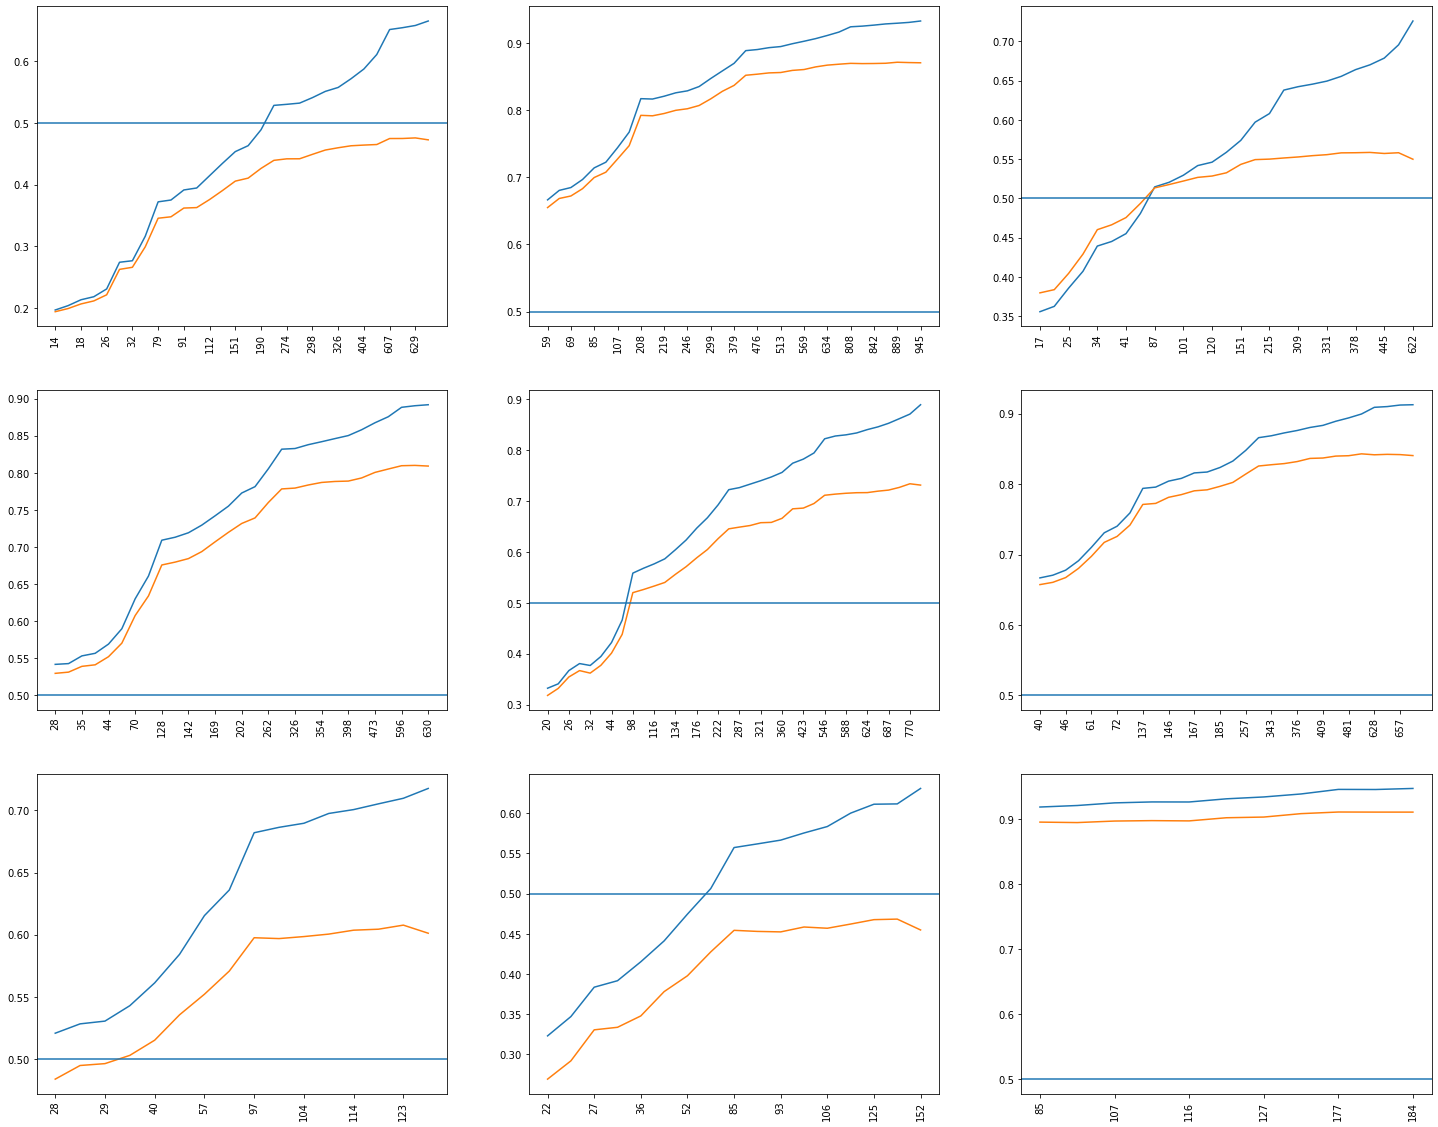

In [8]:
results_cv_sh2 = load("data_intermediate/Results_L1_sh2neibr.joblib")
models_cv_sh2 = load("data_intermediate/Models_L1_sh2neibr.joblib")

plt.figure(figsize=[25, 20])
for select in range(9):
    plt.subplot(int(331 + select))
    list_r2_train = [np.mean(results_cv_sh2[select][alpha]['train_r2']) for alpha in results_cv_sh2[select].keys()]
    list_r2_test = [np.mean(results_cv_sh2[select][alpha]['test_r2']) for alpha in results_cv_sh2[select].keys()]
    list_coef_len = [np.sum(models_cv_sh2[select][alpha].coef_ != 0) for alpha in models_cv_sh2[select].keys()]
    plt.plot(list_r2_train)
    plt.plot(list_r2_test)
    plt.xticks(np.arange(0, len(list_coef_len), 2), list_coef_len[::2], rotation='vertical')
    plt.axhline(0.5)
plt.show()

We can see that typically the top 100 features with the largest coefficients should contribute sufficiently to R^2 prediction. 

For each column, get the top indices and show their identities. Then, get their respective ranks in other models:

In [9]:
Sorted_index = dict()
for select in range(9):
    Sorted_index[select] = list(DF_final_topcoefs.abs().sort_values(by=list(DF_final_topcoefs.columns)[select], ascending=False).index)

display(pd.DataFrame(Sorted_index).iloc[0:10])

,0,1,2,3,4,5,6,7,8
0,Slide_L*Slide_CL,ProT_L*MGW_L_r,Shift_CR*HelT_R_r,Rise_L*Shear_L_r,HelT_L*Shift_L,Roll_L*Slide_L_r,HelT_R*HelT_R,Roll_R_r*Stagger_R_r,Rise_L*Rise_L_r
1,Roll_CL*HelT_CR_r,HelT_L*Roll_L,ProT_C*Stretch_R_r,Stretch_L*Slide_CL_r,HelT_L_r*Stagger_L_r,Shear_C*Stretch_C_r,HelT_R,Stagger_R_r*Stagger_R_r,Rise_L_r*Rise_L_r
2,HelT_CL*Slide_CL,Shift_L_r,Shift_CR*Rise_CR_r,EP_C*Buckle_R_r,Rise_CL*Rise_CR,MGW_L*Stretch_L_r,Buckle_R*Roll_R_r,MGW_C*MGW_R,Rise_L*Rise_L
3,HelT_CR_r*Shift_CR_r,MGW_C*Stretch_C_r,ProT_L*EP_C,Shear_C*Roll_CR_r,Slide_CR_r*ProT_R_r,Shear_C*Opening_R_r,Roll_CL*Tilt_CR,HelT_CR*Slide_R,Shear_R*Shear_R_r
4,ProT_C*EP_R,Rise_L*Roll_L,HelT_L_r*HelT_L_r,HelT_L*Shear_L,Shear_L*HelT_L_r,Roll_R*Roll_R_r,Buckle_R*MGW_R_r,Stagger_C_r*Stretch_R_r,Shear_R*Shear_R
5,Slide_R_r*Shear_R_r,Tilt_L*Rise_L_r,EP_L*Slide_CL_r,Rise_CL_r*Opening_C_r,Slide_L*HelT_L_r,Roll_L*EP_C,Roll_L*Roll_CL,Shift_L*Stretch_L_r,Shear_R_r*Shear_R_r
6,Slide_CL*Shift_CR_r,Slide_CR_r*Opening_R_r,ProT_L_r*EP_C_r,Shift_CL_r*Slide_CR_r,HelT_L_r*Shift_L_r,Stagger_C*HelT_R_r,Stagger_C*Roll_R_r,Tilt_CL_r*ProT_C_r,Shift_R*Slide_R
7,HelT_R*Stagger_R,Slide_CR_r*Slide_CR_r,Roll_L_r*Shear_C_r,Stretch_C*MGW_R_r,Buckle_L_r*EP_L_r,HelT_L*Tilt_L,Slide_L_r*MGW_L_r,Tilt_L_r*Opening_L_r,Shift_R*Slide_R_r
8,ProT_R*HelT_R_r,HelT_L*ProT_C_r,ProT_R*Shift_R_r,HelT_L*Shift_CL_r,HelT_CR_r*Tilt_CR_r,MGW_C*MGW_C,Stretch_R*Stagger_R_r,Roll_CR*Stretch_R,Slide_L*Slide_L_r
9,Opening_L*HelT_L_r,HelT_L_r*Roll_L_r,HelT_L_r,Slide_CL*Roll_CR_r,ProT_C_r*Shear_C_r,HelT_L_r*Buckle_L_r,Tilt_R_r*Opening_R_r,Slide_R*Slide_R_r,Slide_L*Slide_L


Remove a portion of the coefficients, then re-report R^2:

1) A = the top 10% most important variables

2) A = the set of variables where at least one shape feature is Tilt, Stretch, Roll, or Shift

3) A = the set of variables where at least one shape feature is HelT or Slide

In [10]:
# Drop top 10% coefficients
temp_model_top10 = deepcopy(Model_bin_L1_02)
for select in range(9):
    temp_arr = temp_model_top10.model[select].coef_
    temp_drop = np.argsort(np.abs(temp_arr))[::-1][ : len(temp_arr)//10]   # Indices to drop out
    # Drop values
    temp_model_top10.model[select].coef_[np.argsort(np.abs(temp_arr))[::-1][:17]] = 0

In [11]:
# Select and drop variables where at least one shape feature is in the two sets
temp_set1 = np.zeros(shape=len(DF_02_topcoefs), dtype=bool)
temp_set2 = np.zeros(shape=len(DF_02_topcoefs), dtype=bool)

# Create bool lists
for i in range(len(DF_02_topcoefs)):
    if any(item in DF_02_topcoefs.index[i] for item in ["Tilt", "Stretch", "Roll", "Shift"]):
        temp_set1[i] = True
    if any(item in DF_02_topcoefs.index[i] for item in ["HelT", "Slide"]):
        temp_set2[i] = True
        
# Filter
temp_model_set1 = deepcopy(Model_bin_L1_02)
temp_model_set2 = deepcopy(Model_bin_L1_02)

for select in range(9):
    temp_arr = temp_model_set1.model[select].coef_
    # Drop values
    temp_model_set1.model[select].coef_[temp_set1[Indices_rmL1_bin[select]]] = 0
    temp_model_set2.model[select].coef_[temp_set2[Indices_rmL1_bin[select]]] = 0

Test R^2 values:

In [12]:
DF_r2compar_coefdrop = np.zeros(shape=(10, 4), dtype=float)

for select in range(9):
    temp_pred = Pred_2dneibr[Index_class == select][:, Indices_rmL1_bin[select]]
    DF_r2compar_coefdrop[select, 0] = r2_score(Eff_test[Index_class == select], 
                                               Model_bin_L1_02.model[select].predict(temp_pred))
    DF_r2compar_coefdrop[select, 1] = r2_score(Eff_test[Index_class == select], 
                                               temp_model_top10.model[select].predict(temp_pred))
    DF_r2compar_coefdrop[select, 2] = r2_score(Eff_test[Index_class == select], 
                                               temp_model_set1.model[select].predict(temp_pred))
    DF_r2compar_coefdrop[select, 3] = r2_score(Eff_test[Index_class == select], 
                                               temp_model_set2.model[select].predict(temp_pred))
    
DF_r2compar_coefdrop[9, 0] = r2_score(Eff_test, Model_bin_L1_02.predict(Pred_2dneibr, Index_class))
DF_r2compar_coefdrop[9, 1] = r2_score(Eff_test, temp_model_top10.predict(Pred_2dneibr, Index_class))
DF_r2compar_coefdrop[9, 2] = r2_score(Eff_test, temp_model_set1.predict(Pred_2dneibr, Index_class))
DF_r2compar_coefdrop[9, 3] = r2_score(Eff_test, temp_model_set2.predict(Pred_2dneibr, Index_class))

DF_r2compar_coefdrop = pd.DataFrame(DF_r2compar_coefdrop, columns=["original", "top10%", "set1", "set2"])
display(DF_r2compar_coefdrop)

,original,top10%,set1,set2
0,0.578731,-308.518902,-2397.267584,-6763.314309
1,0.922207,-13066.190199,-168937.532034,-2521.167650
2,0.672824,-2044.427779,-145.490714,-471.963670
3,0.868189,-9561.015390,-21486.804105,-3321.829338
4,0.833801,-68351.165541,-17093.529925,-16044.998478
5,0.869824,-2370.611385,-11692.548938,-4042.006980
6,0.634640,-11.543694,-56.736625,-0.610191
7,0.517474,-844.439701,-360.001516,-252.274865
8,0.925088,-211.453580,-6.575024,-33.434808
9,0.993148,-126.457303,-998.515005,-31.453031


This doesn't seem to be a very good idea. Do again with Pearson correlation:

In [13]:
DF_pcompar_coefdrop = np.zeros(shape=(10, 4), dtype=float)

for select in range(9):
    temp_pred = Pred_2dneibr[Index_class == select][:, Indices_rmL1_bin[select]]
    DF_pcompar_coefdrop[select, 0] = pearsonr(Eff_test[Index_class == select], 
                                               Model_bin_L1_02.model[select].predict(temp_pred))[0]
    DF_pcompar_coefdrop[select, 1] = pearsonr(Eff_test[Index_class == select], 
                                               temp_model_top10.model[select].predict(temp_pred))[0]
    DF_pcompar_coefdrop[select, 2] = pearsonr(Eff_test[Index_class == select], 
                                               temp_model_set1.model[select].predict(temp_pred))[0]
    DF_pcompar_coefdrop[select, 3] = pearsonr(Eff_test[Index_class == select], 
                                               temp_model_set2.model[select].predict(temp_pred))[0]
    
DF_pcompar_coefdrop[9, 0] = pearsonr(Eff_test, Model_bin_L1_02.predict(Pred_2dneibr, Index_class))[0]
DF_pcompar_coefdrop[9, 1] = pearsonr(Eff_test, temp_model_top10.predict(Pred_2dneibr, Index_class))[0]
DF_pcompar_coefdrop[9, 2] = pearsonr(Eff_test, temp_model_set1.predict(Pred_2dneibr, Index_class))[0]
DF_pcompar_coefdrop[9, 3] = pearsonr(Eff_test, temp_model_set2.predict(Pred_2dneibr, Index_class))[0]

DF_pcompar_coefdrop = pd.DataFrame(DF_pcompar_coefdrop, columns=["original", "top10%", "set1", "set2"])
display(DF_pcompar_coefdrop)

,original,top10%,set1,set2
0,0.764177,-0.068493,0.233136,0.098660
1,0.960399,0.000703,-0.136213,0.120875
2,0.820815,0.048284,-0.058016,0.180114
3,0.933077,0.158819,0.344604,-0.004163
4,0.913616,-0.003802,0.123442,0.192557
5,0.936482,-0.322763,-0.061775,0.068613
6,0.802775,0.641571,-0.104994,0.544519
7,0.723186,-0.038844,-0.179524,0.392648
8,0.967356,-0.003176,-0.338338,0.694072
9,0.996947,0.528309,0.013563,-0.065594


In [14]:
# Make results
Results_predict_class = dict()
for select in range(9):
    Results_predict_class[select] = Model_bin_L1_final.predict(pred_list, np.full(shape=np.shape(Index_class), fill_value=select))
# Comparison results
results_allmodel = Model_bin_L1_final.predict(pred_list, Index_class)

In [15]:
temp_index = list(Labels_2dneibr)
alpha_list, Indices_rmL1_bin = load_L1_indices(
    "data_intermediate/Results_L1_sh2neibr.joblib", "data_intermediate/Models_L1_sh2neibr.joblib")
Model_bin_L1_02 = load("data_out/Model_sh2neibr.joblib")

DF_02_topcoefs = return_coefs_df(Model_bin_L1_02, Pred_2dneibr, Eff, Indices_rmL1_bin, temp_index, index_class=Index_class, 
                                index_class_labels=Index_class_name, save_filename="data_out/Coefs_sh2neibr.csv")
display(DF_02_topcoefs)

Class 0, Number of predictors: 629
Class 1, Number of predictors: 889
Class 2, Number of predictors: 501
Class 3, Number of predictors: 616
Class 4, Number of predictors: 770
Class 5, Number of predictors: 527
Class 6, Number of predictors: 123
Class 7, Number of predictors: 126
Class 8, Number of predictors: 175


/home/zianl/.conda/envs/research/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


,A>C,A>G,A>T,C>A,C>G,C>T,CpG_C>A,CpG_C>G,CpG_C>T
HelT_L,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HelT_CL,0.00000,0.000000,0.000000,1.387339,0.000000,0.000000,0.000000,0.000000,0.000000
HelT_CR,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051239
HelT_R,0.00000,0.000000,0.000000,0.000000,-0.003336,0.473789,-5.473866,0.000000,0.000000
Rise_L,0.28753,0.343765,0.000000,0.463717,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
MGW_R_r*MGW_R_r,0.00000,-0.215245,0.000000,0.666864,0.000000,0.000000,-0.302775,0.000000,0.000000
MGW_R_r*EP_R_r,-0.01217,0.000000,0.000000,0.547368,0.000000,0.000000,0.000000,0.193074,-0.958992
EP_L_r*EP_L_r,0.00000,0.000000,0.000000,0.000000,0.000000,-0.254604,0.000000,0.000000,0.000000
EP_C_r*EP_C_r,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Plot the relative shape importances using this framework: 

Define each feature as a combination of 1st order features: one shape feature or one nucleotide. Discard shape feature's location information, while encode each of the 6 possible nucleotide locations along with 4 possible nucleotides into 24 elementary features.

Then, apply this framework to the top indices and see which indices are most common.

In [16]:
Index_all = list(DF_final_topcoefs.index)

# Make shape indices
Index_all_scoring_shape = np.zeros(shape=(len(Index_all), ), dtype=object)
for i in range(len(Index_all)):
    item = Index_all[i].split('*')
    if len(item) == 2:
        shape1, shape2 = item[0].split('_'), item[1].split('_')
        if shape1[0] == shape2[0]:
            Index_all_scoring_shape[i] = shape1[0]
        else:
            Index_all_scoring_shape[i] = [shape1[0], shape2[0]]
    else:
        Index_all_scoring_shape[i] = item[0].split("_")[0]

In [17]:
# Make location indices
Index_all_scoring_loc = np.zeros(shape=(len(Index_all), ), dtype=object)
for i in range(len(Index_all)):
    item = Index_all[i].split('*')
    if len(item) == 2:
        shape1, shape2 = item[0].split('_'), item[1].split('_')
        if shape1[1] == shape2[1]:
            Index_all_scoring_loc[i] = shape1[1]
        else:
            Index_all_scoring_loc[i] = [shape1[1], shape2[1]]
    else:
        Index_all_scoring_loc[i] = item[0].split("_")[1]

In [18]:
# Make ref/alt indices
Index_all_scoring_seq = np.zeros(shape=(len(Index_all), ), dtype=object)
for i in range(len(Index_all)):
    item = Index_all[i].split('*')
    if len(item) == 2:
        shape1, shape2 = item[0].split('_'), item[1].split('_')
        if (len(shape1) == 3) and (len(shape2) == 3):
            Index_all_scoring_seq[i] = "alt"
        elif (len(shape1) == 2) and (len(shape2) == 2):
            Index_all_scoring_seq[i] = "ref"
        else:
            Index_all_scoring_seq[i] = "ref|alt"
    else:
        if len(item[0].split("_")) == 3:
            Index_all_scoring_seq[i] = "alt"
        else:
            Index_all_scoring_seq[i] = "ref"

In [19]:
DF_final_topcoefs_reorganize = np.zeros(shape=np.shape(DF_final_topcoefs), dtype=float)
for select in range(9):
    sorting = np.array(np.argsort(DF_final_topcoefs.iloc[:, select].abs()))[::-1]
    DF_final_topcoefs_reorganize[:, select] = np.array(DF_final_topcoefs.iloc[:, select][sorting])

display(pd.DataFrame(DF_final_topcoefs_reorganize).iloc[0:10])

,0,1,2,3,4,5,6,7,8
0,2.701142,-6.387052,0.954368,-3.655144,12.963580,-4.624624,5.671074,1.610373,63.811838
1,-2.665312,-5.979868,0.918944,3.272408,11.178948,-3.618203,-5.473866,1.478881,-35.751741
2,2.492799,-5.630602,-0.881250,2.959975,10.177397,-2.900401,-1.482926,1.439003,-29.250765
3,2.263676,5.439248,0.618496,2.754262,9.734766,2.839511,-1.333337,1.280878,-19.650485
4,1.949494,5.064717,-0.537939,-2.472391,9.184808,2.798779,-1.039065,-1.244104,10.938673
5,-1.900036,4.962406,-0.494423,2.366656,-9.165985,2.731869,1.032367,1.202468,10.217282
6,1.791473,4.903760,0.481942,2.282291,-9.149649,2.668632,1.006513,1.198069,-4.245735
7,1.768363,4.841774,0.479380,2.231997,9.075953,-2.665872,-0.969450,1.162940,3.629629
8,-1.708989,4.782936,-0.478186,2.180987,-8.930943,-2.618413,-0.966303,-1.153440,-2.669738
9,-1.654459,4.745634,0.455339,2.149300,-8.871446,-2.522587,-0.919988,1.055686,2.059640


In [20]:
Sorted_index_scoring_shape, Sorted_index_scoring_loc, Sorted_index_scoring_seq = dict(), dict(), dict()
for select in range(9):
    sorting = np.array(np.argsort(DF_final_topcoefs.iloc[:, select].abs()))[::-1]
    Sorted_index_scoring_shape[select] = Index_all_scoring_shape[sorting]
    Sorted_index_scoring_loc[select] = Index_all_scoring_loc[sorting]
    Sorted_index_scoring_seq[select] = Index_all_scoring_seq[sorting]

Plot an annotated heatmap. Note that we will use the native labels as well as the individual labels as above. We will only show the first 10 rows due to space availability. 

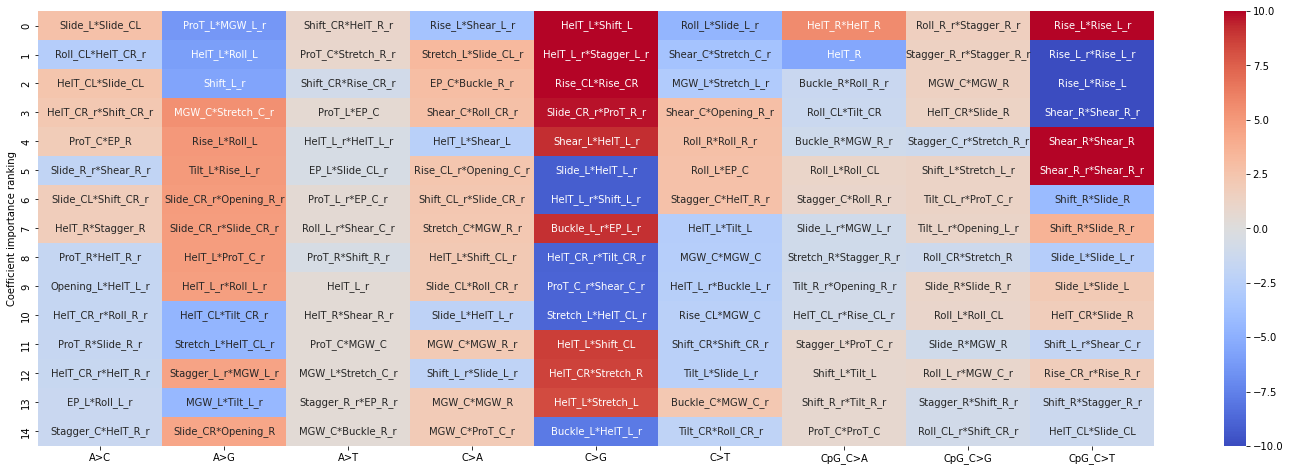

In [21]:
annot_labels = np.array(pd.DataFrame(Sorted_index))

fig_out = plt.figure(figsize=[25, 8])
sns.heatmap(DF_final_topcoefs_reorganize[0:15], vmin=-10, vmax=10, cmap="coolwarm", annot=annot_labels[0:15], fmt='')
plt.ylabel("Coefficient importance ranking")
plt.xticks(np.arange(0, 9)+0.5, Index_class_name)
plt.show()

fig_out.savefig("manuscript/figures/pltout_sup7_topcoefs.pdf")

Next, count the number of occurences of each of the features:

Interacting features will be treated as 1/(total interaction length); if an interaction is HelT x HelT it will be 1 x HelT, but if it's HelT x Roll it will be 0.5 HelT and 0.5 Roll.

In [22]:
Feature_occur_counter_weight = dict()

for select in range(9):
    print(np.sum(DF_final_topcoefs_reorganize[:, select] != 0))
    index_counter = dict()
    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        obj = Sorted_index_scoring_shape[select][i]
        if type(obj) == list:
            for item in obj:
                if item not in index_counter:
                    index_counter[item] = 0
                index_counter[item] += 1/len(obj)
        else:
            if obj not in index_counter:
                index_counter[obj] = 0
            index_counter[obj] += 1
    Feature_occur_counter_weight[select] = index_counter
    
Feature_occur_df_weight = pd.DataFrame(Feature_occur_counter_weight, dtype=float).fillna(0)
display(Feature_occur_df_weight)

629
889
501
616
770
527
123
126
175


,0,1,2,3,4,5,6,7,8
Slide,33.5,49.0,21.5,33.0,54.0,29.0,4.0,11.5,12.5
Roll,67.0,86.5,58.0,66.5,76.5,60.0,11.0,13.5,17.5
HelT,24.5,40.0,16.0,19.5,33.0,15.5,5.5,4.0,9.5
Shift,71.0,84.5,55.5,71.0,79.5,60.0,13.5,10.5,21.0
ProT,55.0,70.0,37.0,42.0,61.5,36.0,6.5,6.5,8.5
EP,27.0,43.5,22.0,31.0,29.0,21.0,1.5,3.5,3.5
Shear,48.0,68.0,39.5,44.5,59.0,38.5,10.5,9.0,13.5
Stagger,50.0,64.5,37.5,49.5,59.0,43.5,10.0,13.0,12.5
Opening,26.0,45.5,28.0,29.0,30.5,25.0,3.0,3.0,3.0
MGW,38.0,67.0,32.0,45.5,55.5,33.5,6.5,11.0,10.0


In [23]:
Feature_occur_counter_weight_n = dict()

for n in [0.05, 0.1, 0.25, 0.5, 0.75]:
    Feature_occur_counter_weight_n[n] = dict()
    for select in range(9):
        index_counter = dict()
        for i in range(int(np.sum(DF_final_topcoefs_reorganize[:, select] != 0) * n)):
            obj = Sorted_index_scoring_shape[select][i]
            if type(obj) == list:
                for item in obj:
                    if item not in index_counter:
                        index_counter[item] = 0
                    index_counter[item] += 1/len(obj)
            else:
                if obj not in index_counter:
                    index_counter[obj] = 0
                index_counter[obj] += 1
        Feature_occur_counter_weight_n[n][select] = Counter(index_counter)
    Feature_occur_counter_weight_n[n] = pd.DataFrame(Feature_occur_counter_weight_n[n], dtype=int).fillna(0)

<ipython-input-23-5b4395e89c8c>:19: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  Feature_occur_counter_weight_n[n] = pd.DataFrame(Feature_occur_counter_weight_n[n], dtype=int).fillna(0)
<ipython-input-23-5b4395e89c8c>:19: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  Feature_occur_counter_weight_n[n] = pd.DataFrame(Feature_occur_counter_weight_n[n], dtype=int).fillna(0)


Display proportion of features in 1) all features and 2) top 10% features. Note that since each model has a different number of features, we will divide by the total number of features in each model so we can compare better

Rank the shapes so that it goes from high to low.

In [63]:
temp_df = Feature_occur_df_weight / np.sum(Feature_occur_df_weight, axis=0)


,0,1,2,3,4,5,6,7,8
Stretch,0.112878,0.106299,0.112774,0.112825,0.105844,0.115750,0.178862,0.130952,0.128571
Tilt,0.110493,0.103487,0.104790,0.100649,0.109740,0.102467,0.121951,0.095238,0.122857
Shift,0.112878,0.095051,0.110778,0.115260,0.103247,0.113852,0.109756,0.083333,0.120000
Roll,0.106518,0.097300,0.115768,0.107955,0.099351,0.113852,0.089431,0.107143,0.100000
Stagger,0.079491,0.072553,0.074850,0.080357,0.076623,0.082543,0.081301,0.103175,0.071429
Shear,0.076312,0.076490,0.078842,0.072240,0.076623,0.073055,0.085366,0.071429,0.077143
Buckle,0.063593,0.065242,0.072854,0.068994,0.062987,0.070209,0.089431,0.055556,0.071429
ProT,0.087440,0.078740,0.073852,0.068182,0.079870,0.068311,0.052846,0.051587,0.048571
MGW,0.060413,0.075366,0.063872,0.073864,0.072078,0.063567,0.052846,0.087302,0.057143
Slide,0.053259,0.055118,0.042914,0.053571,0.070130,0.055028,0.032520,0.091270,0.071429


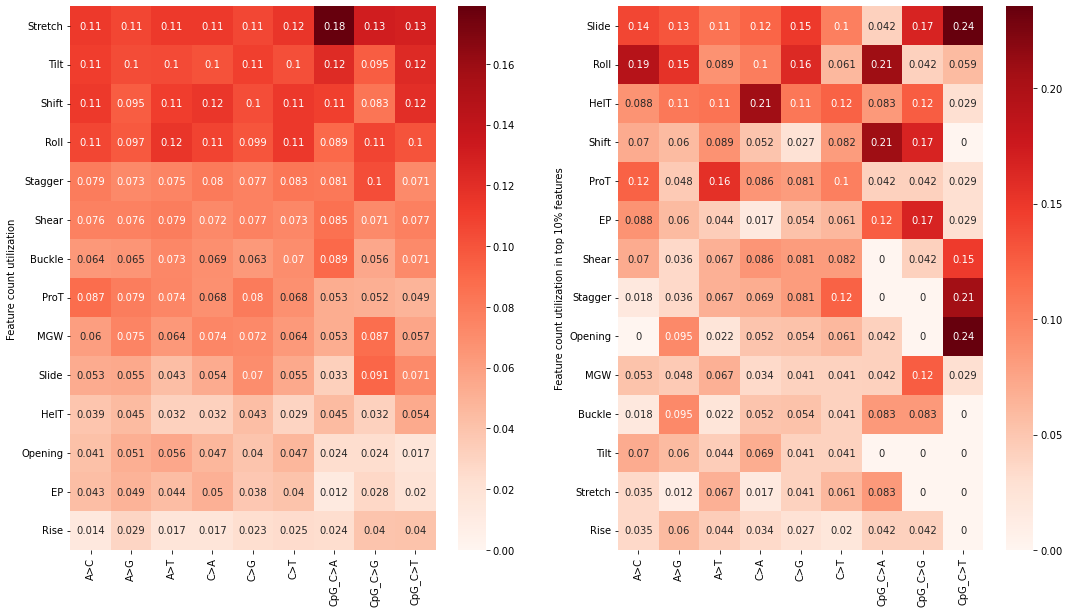

In [64]:
fig_out = plt.figure(figsize=[18, 10])
plt.subplot(121)
temp_df = Feature_occur_df_weight / np.sum(Feature_occur_df_weight, axis=0)
temp_df = temp_df.iloc[np.argsort(temp_df.sum(axis=1))[::-1]]   # Sort by mean/sum
sns.heatmap(temp_df, vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
plt.yticks(np.arange(len(Feature_occur_df_weight))+0.5, temp_df.index, rotation='horizontal')
plt.xticks(np.arange(0, 9)+0.5, Index_class_name, rotation='vertical')

# Same as above, but only for top 10%
plt.subplot(122)
temp_df = Feature_occur_counter_weight_n[0.1] / np.sum(Feature_occur_counter_weight_n[0.1], axis=0)
temp_df = temp_df.iloc[np.argsort(temp_df.sum(axis=1))[::-1]]   # Sort by mean/sum
sns.heatmap(temp_df, vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization in top 10% features")
plt.yticks(np.arange(len(Feature_occur_counter_weight_n[0.1]))+0.5, Feature_occur_counter_weight_n[0.1].index, rotation='horizontal')
plt.xticks(np.arange(0, 9)+0.5, Index_class_name, rotation='vertical')
plt.show()

fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount.pdf", dpi=300)

Do the same as above, but use a clustered heatmap:

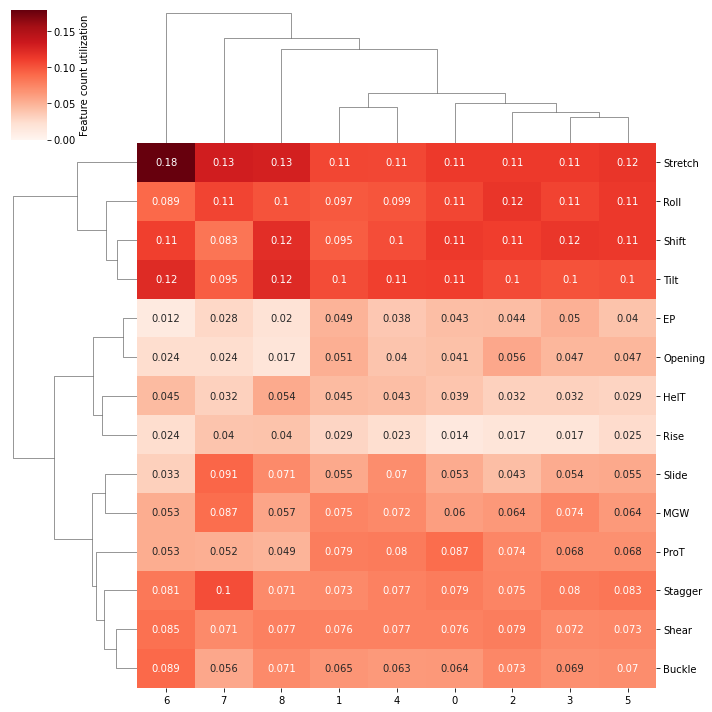

In [25]:
fig_out = sns.clustermap(Feature_occur_df_weight / np.sum(Feature_occur_df_weight, axis=0), 
               vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
plt.show()

fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_1.pdf", dpi=300)

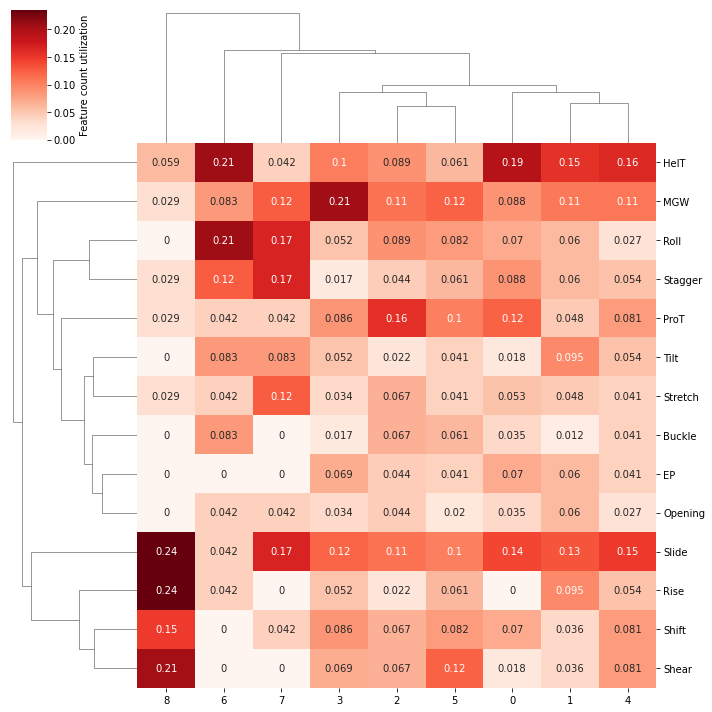

In [26]:
fig_out = sns.clustermap(Feature_occur_counter_weight_n[0.1] / np.sum(Feature_occur_counter_weight_n[0.1], axis=0), 
               vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
plt.show()

fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_2.pdf", dpi=300)

Do this by separating CpG/non-CpG:

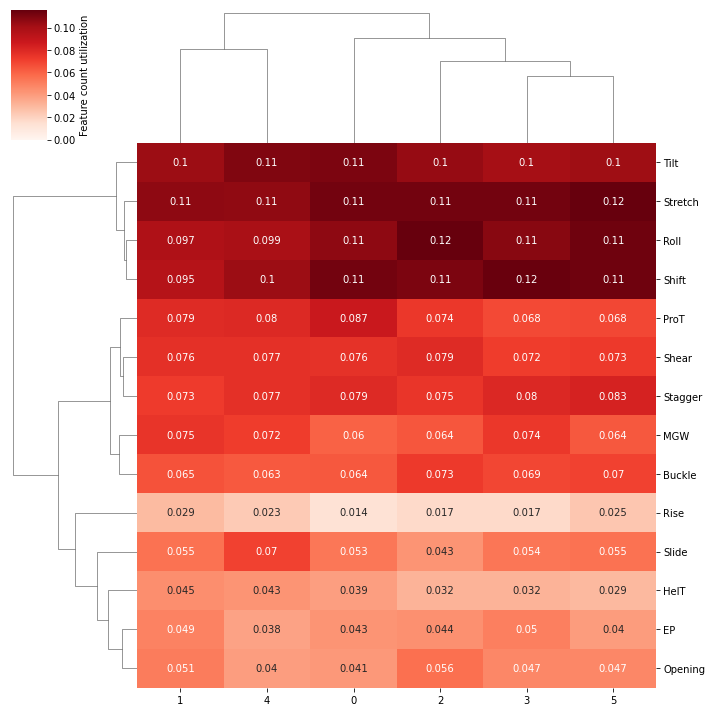

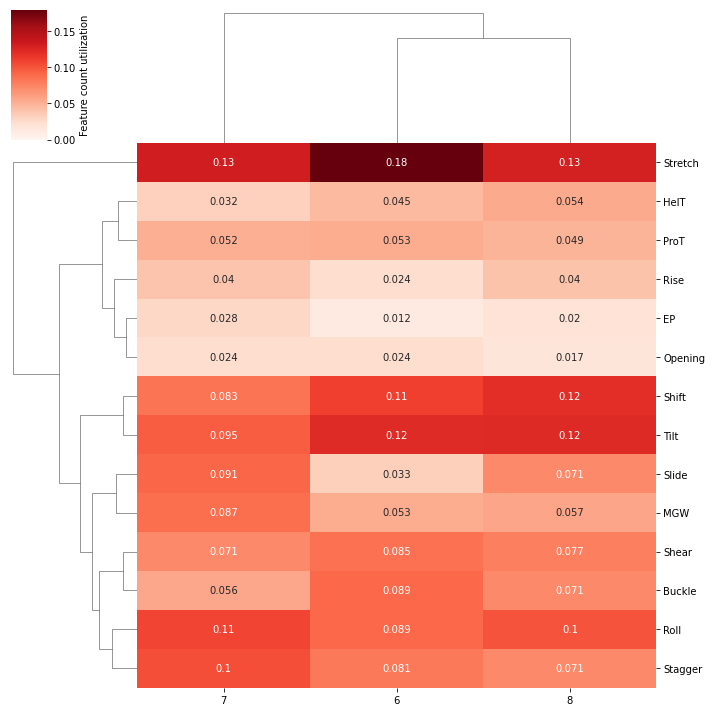

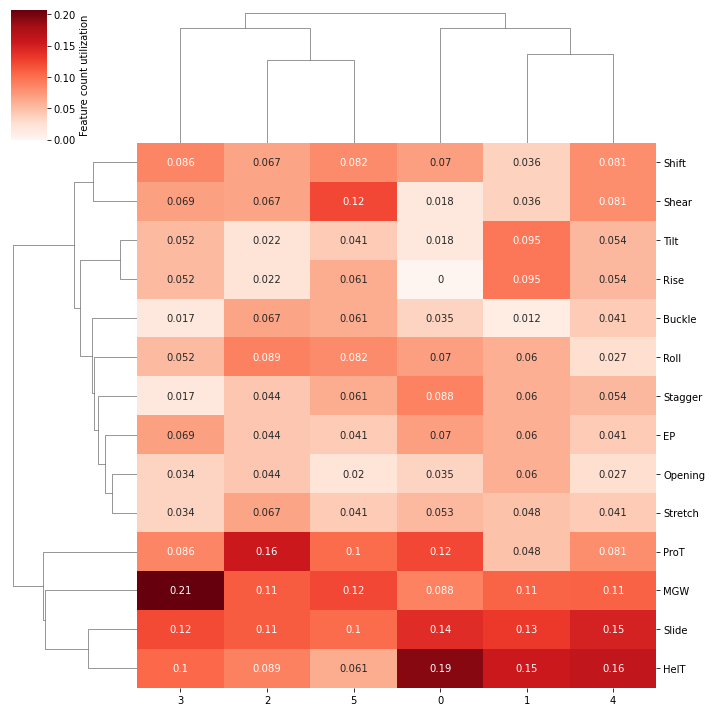

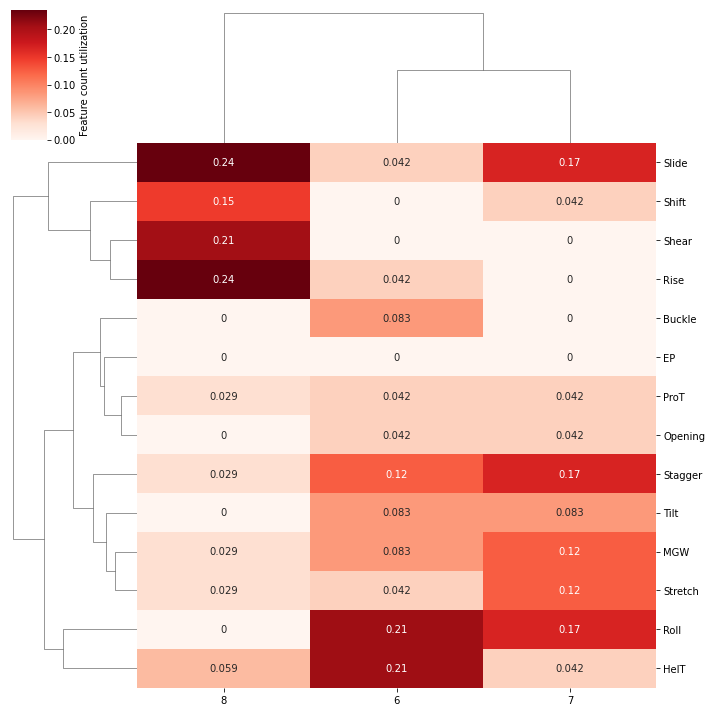

In [27]:
fig_out = sns.clustermap(Feature_occur_df_weight.loc[:, 0:5] / 
                         np.sum(Feature_occur_df_weight.loc[:, 0:5], axis=0), 
               vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_3.pdf", dpi=300)

fig_out = sns.clustermap(Feature_occur_df_weight.loc[:, 6:] / 
                         np.sum(Feature_occur_df_weight.loc[:, 6:], axis=0), 
               vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_4.pdf", dpi=300)

fig_out = sns.clustermap(Feature_occur_counter_weight_n[0.1].loc[:, 0:5] / 
                         np.sum(Feature_occur_counter_weight_n[0.1].loc[:, 0:5], axis=0), 
                         vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_5.pdf", dpi=300)

fig_out = sns.clustermap(Feature_occur_counter_weight_n[0.1].loc[:, 6:] / 
                         np.sum(Feature_occur_counter_weight_n[0.1].loc[:, 6:], axis=0), 
                         vmin=0, cmap="Reds", annot=True)
plt.ylabel("Feature count utilization")
fig_out.savefig("manuscript/figures/pltout_fig3a_shapecount_clustered_6.pdf", dpi=300)

Try doing statistical tests. 

Look at the usage of shapes, whether it is uniform, and whether this changes in smaller Ns.

In [28]:
total_ft_count = Counter([item.split('_')[0] for item in Labels_2d])
total_ft_count_df = pd.DataFrame(np.repeat(list(total_ft_count.values()), 9).reshape(-1, 9))
total_ft_count_df.index = total_ft_count.keys()

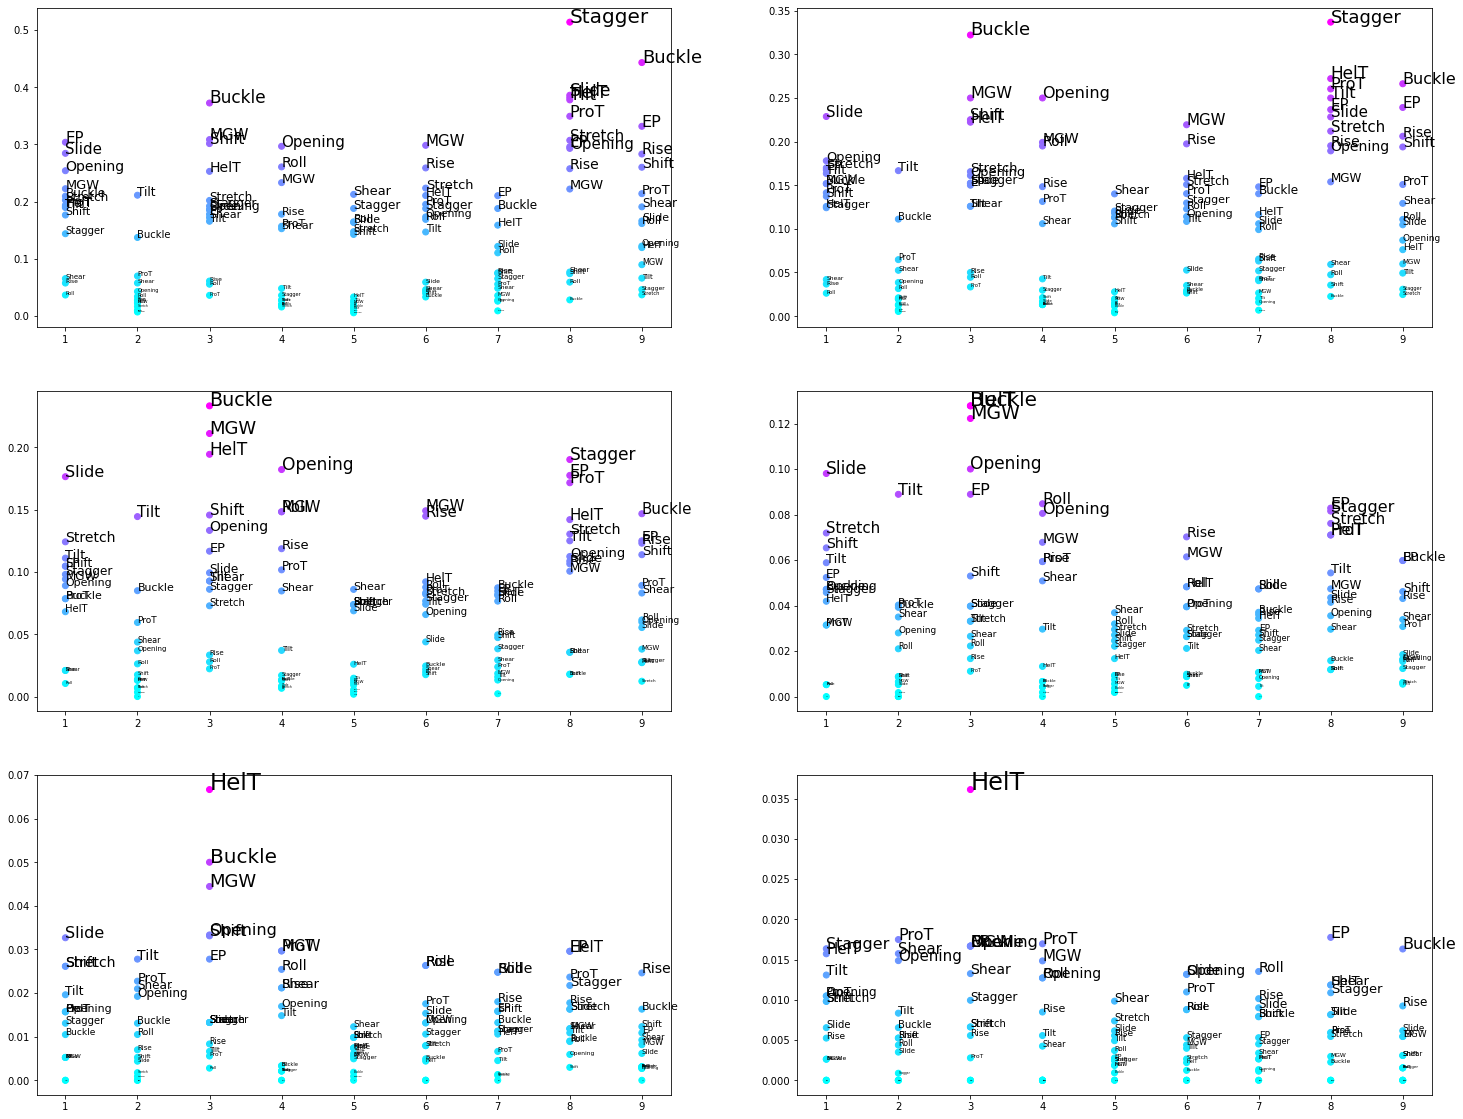

In [29]:
Total_ft_usage = dict()
plt.figure(figsize=[25, 20])

for i in range(6):
    n = [1, 0.75, 0.5, 0.25, 0.1, 0.05][i]
    if i == 0:
        input_df = Feature_occur_df_weight
    else:
        input_df = Feature_occur_counter_weight_n[n]
    Total_ft_usage[n] = input_df.divide(total_ft_count_df, axis=0)
    
    plt.subplot(int(321+i))
    xplot = np.repeat(np.arange(1, 10), len(Total_ft_usage[n]))
    yplot = np.array(Total_ft_usage[n]).reshape(-1, )
    mplot = list(Total_ft_usage[n].index) * np.shape(Total_ft_usage[n])[1]
    plt.scatter(x=xplot, y=yplot, c=yplot, cmap='cool')
    for i in range(len(xplot)):
        plt.text(x=xplot[i], y=yplot[i], s=mplot[i], fontsize=int(np.sqrt(800*yplot[i]/n)))

plt.show()

#### Fisher's exact test for enrichment

For each shape such as HelT, find out four numbers: 1) the number of HelT in top N% features, 2) the number of non-HelT in top N% features, 3) the number of HelT not in top N% features, and 4) the number of non HelT not in top N% features. Then, test to see whether this shape is enriched in the top N% features. 

Note that p-values are adjusted by BH FDR; since each test involves 14 shapes, the adjustment factor is within these shapes.

Compare across shapes. 

In [30]:
n = 0.1

DF_oddsratio, DF_pval = np.empty(shape=np.shape(Feature_occur_df_weight), dtype=float), np.empty(shape=np.shape(Feature_occur_df_weight), dtype=float)

for select in range(9):
    for i in range(len(Feature_occur_df_weight)):
        shape = list(Feature_occur_df_weight.index)[i]
        sum_shcount = float(Feature_occur_df_weight.iloc[i, select])   # Sum of 1 and 3
        #sum_shcount = total_ft_count[shape]   # Sum of 1 and 3, alternative (use all possible fts)
        sum_n_all = np.sum(Feature_occur_counter_weight_n[n].iloc[:, select])   # Sum of 1 and 2
        sum_all = np.sum(Feature_occur_df_weight.iloc[:, select])   # Sum of 1, 2, 3, 4
        #sum_all = np.sum(list(total_ft_count.values()))   # Sum of 1, 2, 3, 4, alternative (use all possible fts)
        num_1 = Feature_occur_counter_weight_n[n].iloc[i, select]   # Number 1, count of shape in top N%
        num_2 = sum_n_all - num_1   # Number 2, count of not shape in top N%
        num_3 = sum_shcount - num_1   # Number 3, count of shape not in top N%
        num_4 = sum_all - sum_n_all - num_3   # Number 4, count of not shape not in top N%
        DF_oddsratio[i, select], DF_pval[i, select] = fisher_exact([[num_1, num_2], [num_3, num_4]], alternative='greater')
# Multiple testing adjustment
_, DF_pval_adj, _, _ = multipletests(pvals=DF_pval.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False)
DF_pval_adj = DF_pval_adj.reshape(np.shape(DF_pval))

DF_oddsratio, DF_pval, DF_pval_adj = pd.DataFrame(DF_oddsratio), pd.DataFrame(DF_pval), pd.DataFrame(DF_pval_adj)
DF_oddsratio.index, DF_pval.index, DF_pval_adj.index = Feature_occur_df_weight.index, Feature_occur_df_weight.index, Feature_occur_df_weight.index
temp_col = ["Class_" + str(int(select)) for select in range(9)]
DF_oddsratio.columns, DF_pval.columns, DF_pval_adj.columns = temp_col, temp_col, temp_col

with pd.ExcelWriter("./data_out/Stats_fishers_coefs_10perc.xlsx", mode='w') as export_df:
    DF_oddsratio.to_excel(export_df, sheet_name='odds_ratio')
    DF_pval.to_excel(export_df, sheet_name='p_values')
    DF_pval_adj.to_excel(export_df, sheet_name='p_values_adj')
    
display(DF_oddsratio)
display(DF_pval)
display(DF_pval_adj)

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,3.565714,3.041456,3.429688,2.808446,2.651532,2.149621,0.000000,2.311111,5.730769
Roll,0.609763,0.564932,0.726287,0.427706,0.233108,0.669841,2.833333,1.854545,0.000000
HelT,10.264214,5.275952,3.609756,4.828402,6.221198,2.527174,8.000000,0.000000,1.164062
Shift,0.568854,0.330590,0.553571,0.703259,0.751813,0.669841,0.000000,0.000000,1.103175
ProT,1.528333,0.559848,2.615789,1.328404,1.026738,1.638563,0.000000,0.000000,0.000000
EP,1.801477,1.275816,1.013953,1.456790,1.088841,1.027996,0.000000,0.000000,0.000000
Shear,0.199468,0.421652,0.831349,0.957407,1.070477,1.940407,0.000000,0.000000,3.415385
Stagger,1.126068,0.799185,0.558140,0.186038,0.665974,0.712500,1.275000,1.872727,0.000000
Opening,0.830303,1.208861,0.769231,0.702381,0.661706,0.394097,0.000000,0.000000,0.000000
MGW,1.570513,1.545517,1.986111,4.142292,1.671180,2.325581,1.909091,1.155556,0.000000


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,0.006419,0.004039,0.032083,0.027536,0.009748,0.120928,1.000000,0.284666,0.019202
Roll,0.881399,0.928721,0.793493,0.962842,0.996985,0.837000,0.225651,0.361989,1.000000
HelT,0.000001,0.000028,0.046406,0.005587,0.000018,0.155823,0.063893,1.000000,0.612674
Shift,0.908390,0.991220,0.896701,0.826497,0.797968,0.837000,1.000000,1.000000,0.578077
ProT,0.220371,0.915875,0.037821,0.360574,0.546008,0.234727,1.000000,1.000000,1.000000
EP,0.222087,0.384702,0.605772,0.332362,0.540330,0.598977,1.000000,1.000000,1.000000
Shear,0.991334,0.966558,0.705101,0.613680,0.509763,0.129929,1.000000,1.000000,0.103107
Stagger,0.482132,0.745450,0.867900,0.993684,0.841490,0.789041,0.588971,0.358012,1.000000
Opening,0.702383,0.424412,0.738725,0.779044,0.804254,0.917921,1.000000,1.000000,1.000000
MGW,0.254696,0.170900,0.148668,0.000403,0.147465,0.074892,0.470116,0.619503,1.000000


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,0.089867,0.072694,0.310962,0.289124,0.122830,0.692589,1.000000,1.0,0.219954
Roll,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.947736,1.0,1.000000
HelT,0.000167,0.001180,0.389808,0.088002,0.001120,0.755141,0.473560,1.0,1.000000
Shift,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
ProT,0.947736,1.000000,0.340388,1.000000,1.000000,0.954050,1.000000,1.0,1.000000
EP,0.947736,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
Shear,1.000000,1.000000,1.000000,1.000000,1.000000,0.711787,1.000000,1.0,0.649573
Stagger,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
Opening,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
MGW,1.000000,0.797532,0.749284,0.012695,0.749284,0.524245,1.000000,1.0,1.000000


Do it again with N=5%:

In [31]:
n = 0.05

DF_oddsratio, DF_pval = np.empty(shape=np.shape(Feature_occur_df_weight), dtype=float), np.empty(shape=np.shape(Feature_occur_df_weight), dtype=float)

for select in range(9):
    for i in range(len(Feature_occur_df_weight)):
        shape = list(Feature_occur_df_weight.index)[i]
        sum_shcount = float(Feature_occur_df_weight.iloc[i, select])   # Sum of 1 and 3
        #sum_shcount = total_ft_count[shape]   # Sum of 1 and 3, alternative (use all possible fts)
        sum_n_all = np.sum(Feature_occur_counter_weight_n[n].iloc[:, select])   # Sum of 1 and 2
        sum_all = np.sum(Feature_occur_df_weight.iloc[:, select])   # Sum of 1, 2, 3, 4
        #sum_all = np.sum(list(total_ft_count.values()))   # Sum of 1, 2, 3, 4, alternative (use all possible fts)
        num_1 = Feature_occur_counter_weight_n[n].iloc[i, select]   # Number 1, count of shape in top N%
        num_2 = sum_n_all - num_1   # Number 2, count of not shape in top N%
        num_3 = sum_shcount - num_1   # Number 3, count of shape not in top N%
        num_4 = sum_all - sum_n_all - num_3   # Number 4, count of not shape not in top N%
        DF_oddsratio[i, select], DF_pval[i, select] = fisher_exact([[num_1, num_2], [num_3, num_4]], alternative='greater')
# Multiple testing adjustment
_, DF_pval_adj, _, _ = multipletests(pvals=DF_pval.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False)
DF_pval_adj = DF_pval_adj.reshape(np.shape(DF_pval))

DF_oddsratio, DF_pval, DF_pval_adj = pd.DataFrame(DF_oddsratio), pd.DataFrame(DF_pval), pd.DataFrame(DF_pval_adj)
DF_oddsratio.index, DF_pval.index, DF_pval_adj.index = Feature_occur_df_weight.index, Feature_occur_df_weight.index, Feature_occur_df_weight.index
temp_col = ["Class_" + str(int(select)) for select in range(9)]
DF_oddsratio.columns, DF_pval.columns, DF_pval_adj.columns = temp_col, temp_col, temp_col

with pd.ExcelWriter("./data_out/Stats_fishers_coefs_05perc.xlsx", mode='w') as export_df:
    DF_oddsratio.to_excel(export_df, sheet_name='odds_ratio')
    DF_pval.to_excel(export_df, sheet_name='p_values')
    DF_pval_adj.to_excel(export_df, sheet_name='p_values_adj')
    
display(DF_oddsratio)
display(DF_pval)
display(DF_pval_adj)

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,3.018568,3.307798,0.991304,2.212202,1.767742,1.682540,0.000000,0.000000,2.012987
Roll,0.282228,1.037940,0.306287,0.604167,0.258431,1.176316,6.000000,0.000000,0.000000
HelT,13.227273,9.100000,4.856643,2.479303,10.254808,6.137500,18.833333,0.000000,0.000000
Shift,0.528736,0.236330,0.339775,0.846405,0.517119,0.342835,0.000000,0.000000,1.050000
ProT,1.189542,0.946349,2.556999,0.975000,1.092672,0.609091,0.000000,0.000000,0.000000
EP,0.788966,0.492063,2.181818,0.684729,1.589226,1.100000,0.000000,0.000000,0.000000
Shear,0.000000,0.299273,1.662879,0.959436,0.720893,1.235450,0.000000,0.000000,9.360000
Stagger,1.256079,0.667233,0.000000,0.000000,0.343306,0.498918,0.000000,4.954545,0.000000
Opening,1.649425,0.468531,0.000000,0.738095,0.715010,0.000000,0.000000,0.000000,0.000000
MGW,0.537356,0.994510,2.101881,3.658863,1.229567,2.365000,0.000000,2.200000,0.000000


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,0.065615,0.018704,0.651732,0.187170,0.225192,0.365311,1.000000,1.000000,0.442314
Roll,0.967327,0.554310,0.957453,0.839955,0.976001,0.498572,0.089731,1.000000,1.000000
HelT,0.000004,0.000003,0.039982,0.224097,0.000005,0.023588,0.018993,1.000000,1.000000
Shift,0.885568,0.982916,0.943153,0.694695,0.892895,0.941787,1.000000,1.000000,0.648370
ProT,0.487317,0.624978,0.103558,0.622598,0.536673,0.810558,1.000000,1.000000,1.000000
EP,0.727893,0.868863,0.267582,0.774133,0.384075,0.615492,1.000000,1.000000,1.000000
Shear,1.000000,0.961533,0.308092,0.630790,0.767194,0.506897,1.000000,1.000000,0.014821
Stagger,0.454531,0.800693,1.000000,1.000000,0.942520,0.865432,1.000000,0.116515,1.000000
Opening,0.370844,0.880991,1.000000,0.749979,0.759530,1.000000,1.000000,1.000000,1.000000
MGW,0.845828,0.593980,0.208957,0.014386,0.464466,0.168826,1.000000,0.428703,1.000000


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Slide,0.751587,0.299142,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Roll,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.942181,1.000000,1.000000
HelT,0.000214,0.000214,0.503776,1.000000,0.000214,0.330237,0.299142,1.000000,1.000000
Shift,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ProT,1.000000,1.000000,0.964066,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EP,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Shear,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.299142
Stagger,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978729,1.000000
Opening,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MGW,1.000000,1.000000,1.000000,0.299142,1.000000,1.000000,1.000000,1.000000,1.000000


#### Binomial test for enrichment

For each model, count the number of occurrences of each shape in 10% incremental bins.

Then, test its binomial p-value using the size of each bin and p = 1/number of features.

In [32]:
Feature_occur_counter_weight_bin = dict()

for select in np.arange(9):
    Feature_occur_counter_weight_bin[select] = dict()
    rangeint = np.sum(DF_final_topcoefs_reorganize[:, select] != 0)
    for j in np.arange(10):
        n_low = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0][j]
        n_high = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1][j]
        index_counter = dict()
        for i in np.arange(int(rangeint*n_low), int(rangeint*n_high)):
            obj = Sorted_index_scoring_shape[select][i]
            if type(obj) == list:
                for item in obj:
                    if item not in index_counter:
                        index_counter[item] = 0
                    index_counter[item] += 1/len(obj)
            else:
                if obj not in index_counter:
                    index_counter[obj] = 0
                index_counter[obj] += 1
        Feature_occur_counter_weight_bin[select][j] = Counter(index_counter)
    Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)

<ipython-input-32-6e5782938ed8>:22: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)
<ipython-input-32-6e5782938ed8>:22: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)


In [33]:
def parallel_binom(array_success, pval_array, include_adj=False):
    if type(array_success) != pd.DataFrame:
        array_success = pd.DataFrame(array_success)
    n_array = np.array(np.sum(array_success, axis=0))   # creates the n array
    # Note: the following requires the binom_test function from scipy.stats
    array_out = np.empty(shape=np.shape(array_success), dtype=float)
    for _i in range(len(array_out)):
        array_out[_i] = np.array([binom_test(array_success.iloc[_i, _j], n_array[_j], pval_array[_j], alternative='greater') 
                                  for _j in range(np.shape(array_out)[1])], dtype=object)
    if include_adj:
        _, array_out_adj, _, _ = multipletests(pvals=array_out.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False)
        array_out_adj = pd.DataFrame(array_out_adj.reshape(np.shape(array_out)))
        array_out_adj.index = array_success.index
    array_out = pd.DataFrame(array_out)
    array_out.index = array_success.index
    if include_adj:
        return array_out, array_out_adj
    else:
        return array_out

Do the binomial test as the following:

In [34]:
DF_binompval, DF_binompval_adj = dict(), dict()
for select in range(9):
    pval_array = np.array(list(Feature_occur_counter_weight[select].values())) / np.sum(list(Feature_occur_counter_weight[select].values()))
    DF_binompval[select], DF_binompval_adj[select] = parallel_binom(Feature_occur_counter_weight_bin[select], pval_array, include_adj=True)
    DF_binompval[select].columns = [str(int(perc)) + "%tile" for perc in np.arange(10, 110, 10)]
    DF_binompval_adj[select].columns = [str(int(perc)) + "%tile_adj" for perc in np.arange(10, 110, 10)]

Return results, save as excel table.

In [35]:
with pd.ExcelWriter("./data_out/Stats_binom_coefs_bin10perc.xlsx", mode='w') as export_df:
    for select in range(9):
        DF_binompval[select].to_excel(export_df, sheet_name="Class_"+str(select), header=True, index=True)
        DF_binompval_adj[select].to_excel(export_df, sheet_name="Class_"+str(select)+"_adj", header=True, index=True)
# Display one class for example
display( DF_binompval[0] )
display( DF_binompval_adj[0] )

,10%tile,20%tile,30%tile,40%tile,50%tile,60%tile,70%tile,80%tile,90%tile,100%tile
Roll,0.018354,0.101265,0.011168,0.911973,0.255377,0.040524,0.030901,0.568245,0.101905,0.454128
Stretch,0.001749,0.009536,0.000726,0.064121,0.255377,0.040524,0.654884,0.994583,0.235786,0.677106
Shift,0.000458,0.626684,0.098723,0.217465,0.069689,0.000886,0.457014,0.232753,0.715069,0.454128
Tilt,0.244202,0.184816,0.000005,0.667740,0.140954,0.012971,0.151620,0.385393,0.037251,0.971332
Stagger,0.433966,0.961300,0.446633,0.810194,0.769507,0.108784,0.280463,0.232753,0.101905,0.260578
ProT,0.855454,0.990528,0.230263,0.667740,0.769507,0.040524,0.011786,0.568245,0.011697,0.055154
Shear,0.118234,0.961300,0.011168,0.911973,0.595987,0.247143,0.457014,0.747688,0.037251,0.971332
Buckle,0.658851,0.779492,0.230263,0.810194,0.255377,0.726068,0.942019,0.965112,0.101905,0.866264
MGW,0.855454,0.990528,0.446633,0.999147,0.969908,0.726068,0.829070,0.125419,0.037251,0.260578
EP,0.855454,0.990528,0.446633,0.999147,0.969908,0.726068,0.942019,0.886218,0.235786,0.454128


,10%tile_adj,20%tile_adj,30%tile_adj,40%tile_adj,50%tile_adj,60%tile_adj,70%tile_adj,80%tile_adj,90%tile_adj,100%tile_adj
Roll,0.197654,0.475557,0.150003,1.000000,0.715312,0.270161,0.270161,1.000000,0.475557,1.000000
Stretch,0.040808,0.150003,0.024820,0.390299,0.715312,0.270161,1.000000,1.000000,0.715312,1.000000
Shift,0.024820,1.000000,0.475557,0.715312,0.406517,0.024820,1.000000,0.715312,1.000000,1.000000
Tilt,0.715312,0.715312,0.000712,1.000000,0.580399,0.151326,0.606481,1.000000,0.270161,1.000000
Stagger,1.000000,1.000000,1.000000,1.000000,1.000000,0.491283,0.755092,0.715312,0.475557,0.715312
ProT,1.000000,1.000000,0.715312,1.000000,1.000000,0.270161,0.150003,1.000000,0.150003,0.350979
Shear,0.517274,1.000000,0.150003,1.000000,1.000000,0.715312,1.000000,1.000000,0.270161,1.000000
Buckle,1.000000,1.000000,0.715312,1.000000,0.715312,1.000000,1.000000,1.000000,0.475557,1.000000
MGW,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.532081,0.270161,0.715312
EP,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.715312,1.000000


Do it again, but this time in 20% bin increments:

In [36]:
Feature_occur_counter_weight_bin = dict()

for select in np.arange(9):
    Feature_occur_counter_weight_bin[select] = dict()
    rangeint = np.sum(DF_final_topcoefs_reorganize[:, select] != 0)
    for j in np.arange(5):
        n_low = [0.8, 0.6, 0.4, 0.2, 0][j]
        n_high = [1, 0.8, 0.6, 0.4, 0.2][j]
        index_counter = dict()
        for i in np.arange(int(rangeint*n_low), int(rangeint*n_high)):
            obj = Sorted_index_scoring_shape[select][i]
            if type(obj) == list:
                for item in obj:
                    if item not in index_counter:
                        index_counter[item] = 0
                    index_counter[item] += 1/len(obj)
            else:
                if obj not in index_counter:
                    index_counter[obj] = 0
                index_counter[obj] += 1
        Feature_occur_counter_weight_bin[select][j] = Counter(index_counter)
    Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)

<ipython-input-36-30f9cf1a3510>:22: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)
<ipython-input-36-30f9cf1a3510>:22: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  Feature_occur_counter_weight_bin[select] = pd.DataFrame(Feature_occur_counter_weight_bin[select], dtype=int).fillna(0)


In [37]:
DF_binompval, DF_binompval_adj = dict(), dict()
for select in range(9):
    pval_array = np.array(list(Feature_occur_counter_weight[select].values())) / np.sum(list(Feature_occur_counter_weight[select].values()))
    DF_binompval[select], DF_binompval_adj[select] = parallel_binom(Feature_occur_counter_weight_bin[select], pval_array, include_adj=True)
    DF_binompval[select].columns = [str(int(perc)) + "%tile" for perc in np.arange(20, 101, 20)]
    DF_binompval_adj[select].columns = [str(int(perc)) + "%tile_adj" for perc in np.arange(20, 101, 20)]

In [38]:
with pd.ExcelWriter("./data_out/Stats_binom_coefs_bin20perc.xlsx", mode='w') as export_df:
    for select in range(9):
        DF_binompval[select].to_excel(export_df, sheet_name="Class_"+str(select), header=True, index=True)
        DF_binompval_adj[select].to_excel(export_df, sheet_name="Class_"+str(select)+"_adj", header=True, index=True)
# Display one class for example
display( DF_binompval[0] )
display( DF_binompval_adj[0] )

,20%tile,40%tile,60%tile,80%tile,100%tile
MGW,7.776553e-01,0.999389,0.709806,0.754885,0.379201
EP,8.908437e-01,0.999389,0.709806,0.998851,0.749006
Shift,7.700337e-05,0.438673,0.000001,0.653138,0.916539
Tilt,5.208285e-03,0.102734,0.000094,0.541601,0.916539
Stretch,1.024619e-07,0.036428,0.000329,0.996187,0.916539
Opening,6.286571e-01,0.999882,0.346654,0.989464,0.998859
Stagger,4.666065e-01,0.957461,0.022374,0.541601,0.631200
Roll,7.700337e-05,0.771601,0.001067,0.541601,0.749006
Slide,9.590488e-01,0.992613,0.524958,0.996187,0.268904
Shear,1.967822e-01,0.669014,0.022374,0.948208,0.916539


,20%tile_adj,40%tile_adj,60%tile_adj,80%tile_adj,100%tile_adj
MGW,1.000000,1.000000,1.000000,1.0,1.000000
EP,1.000000,1.000000,1.000000,1.0,1.000000
Shift,0.001322,1.000000,0.000052,1.0,1.000000
Tilt,0.045572,0.513668,0.001322,1.0,1.000000
Stretch,0.000007,0.212497,0.003843,1.0,1.000000
Opening,1.000000,1.000000,1.000000,1.0,1.000000
Stagger,1.000000,1.000000,0.142381,1.0,1.000000
Roll,0.001322,1.000000,0.010673,1.0,1.000000
Slide,1.000000,1.000000,1.000000,1.0,1.000000
Shear,0.810280,1.000000,0.142381,1.0,1.000000


#### First order vs second order?

What are the proportions of first vs second order shapes?

In [39]:
Feature_occur_1v2 = dict()
for select in range(9):
    index_counter = dict()
    for obj in [1, 2]:
        index_counter[obj] = 0
    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        item1 = Sorted_index_scoring_shape[select][i]
        if type(item1) == list:
            index_counter[2] += 1
        else:
            index_counter[1] += 1
    Feature_occur_1v2[select] = index_counter

Feature_occur_2prop = [Feature_occur_1v2[select][2] / (Feature_occur_1v2[select][1] + Feature_occur_1v2[select][2]) for select in range(9)]

Feature_occur_1v2 = pd.DataFrame(Feature_occur_1v2, dtype=int)
display(Feature_occur_1v2)
print(Feature_occur_2prop)

,0,1,2,3,4,5,6,7,8
1,100,125,89,100,117,90,36,36,47
2,529,764,412,516,653,437,87,90,128


[0.8410174880763116, 0.859392575928009, 0.8223552894211577, 0.8376623376623377, 0.8480519480519481, 0.8292220113851992, 0.7073170731707317, 0.7142857142857143, 0.7314285714285714]


What about by bin?

In [40]:
Feature_occur_1v2_bin = dict()
for select in range(9):
    Feature_occur_1v2_bin[select] = dict()
    rangeint = np.sum(DF_final_topcoefs_reorganize[:, select] != 0)
    for j in np.arange(10):
        n_low = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0][j]
        n_high = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1][j]
        index_counter = {1: 0, 2: 0}
        for i in np.arange(int(rangeint*n_low), int(rangeint*n_high)):
            item1 = Sorted_index_scoring_shape[select][i]
            if type(item1) == list:
                index_counter[2] += 1
            else:
                index_counter[1] += 1
        Feature_occur_1v2_bin[select][n_high] = index_counter
    Feature_occur_1v2_bin[select] = pd.DataFrame(Feature_occur_1v2_bin[select], dtype=int)

display(Feature_occur_1v2_bin)

{0:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   13   13   15   13    8    6    7   12    5    8
 2   50   50   48   50   55   57   56   51   58   54,
 1:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   24   22   13   16   12    8    7    6    6   11
 2   65   67   76   73   77   81   82   83   83   77,
 2:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   15   15    6   13    8    7    8    9    5    3
 2   36   35   44   37   42   43   42   41   45   47,
 3:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   16   14   16    9   10   11    7   11    1    5
 2   46   48   45   53   51   51   55   50   61   56,
 4:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   15   14   18   16   17    8    7    5    9    8
 2   62   63   59   61   60   69   70   72   68   69,
 5:    1.0  0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1
 1   12   13    6   13    9    8    7    8    6    8
 2   41   40   47   39   44   45   45   45   47   44,
 6:    1.0  0.9  0.8  

Display a heatmap of the portion of features that are second-order interactions:

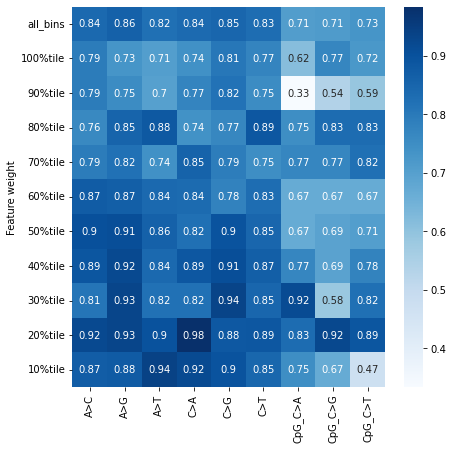

In [41]:
temp_plot = np.empty(shape=(9, 10), dtype=float)
for select in range(9):
    for i in range(10):
        n_high = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1][i]
        temp_plot[select, i] = Feature_occur_1v2_bin[select][n_high][2] / np.sum(Feature_occur_1v2_bin[select][n_high])
# Add the "all models" ratio
temp_plot = np.concatenate((np.array(Feature_occur_2prop).reshape(-1, 1), temp_plot), axis=1)
        
fig_out = plt.figure(figsize=[7, 7])

sns.heatmap(np.transpose(temp_plot), cmap="Blues", annot=True)
plt.ylabel("Feature weight")
plt.yticks(np.arange(0, 11)+0.5, ['all_bins']+[str(int(perc)) + "%tile" for perc in np.arange(100, 0, -10)], rotation='horizontal')
plt.xticks(np.arange(0, 9)+0.5, Index_class_name, rotation='vertical')

plt.show()
fig_out.savefig("manuscript/figures/pltout_fig3a_secorderportion.pdf", dpi=300)

#### Location/refalt enrichments?

Next, do the same but for feature location / reference alternative allele instead. 

For easy analysis, we will use both the 4-location and 3-location system.

The ref * alt shapes will still be counted as 0.5 * ref + 0.5 * alt.

In [42]:
# Feature location and sequence info
Feature_loc_count, Feature_seq_count = dict(), dict()
for select in range(9):
    index_counter_c, index_counter_s = dict(), dict()
    for obj in ['L', 'CL', 'C', 'CR', 'R']:
        index_counter_c[obj] = 0
    for obj in ['ref', 'alt', 'ref|alt']:
        index_counter_s[obj] = 0
    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        item1, item2 = Sorted_index_scoring_loc[select][i], Sorted_index_scoring_seq[select][i]
        if type(item1) == list:
            for obj1 in item1:
                index_counter_c[obj1] += 1
        else:
            index_counter_c[item1] += 1
        index_counter_s[item2] += 1
    Feature_loc_count[select], Feature_seq_count[select] = index_counter_c, index_counter_s
    
Feature_loc_count_df, Feature_seq_count_df = pd.DataFrame(Feature_loc_count, dtype=float).fillna(0), \
                                             pd.DataFrame(Feature_seq_count, dtype=float).fillna(0)
display(Feature_loc_count_df)
display(Feature_seq_count_df)

,0,1,2,3,4,5,6,7,8
L,249.0,372.0,206.0,258.0,329.0,229.0,59.0,55.0,83.0
CL,107.0,151.0,79.0,102.0,128.0,73.0,17.0,17.0,25.0
C,229.0,344.0,176.0,227.0,285.0,188.0,37.0,37.0,55.0
CR,105.0,141.0,77.0,89.0,142.0,79.0,12.0,21.0,28.0
R,244.0,334.0,199.0,241.0,271.0,206.0,41.0,48.0,61.0


,0,1,2,3,4,5,6,7,8
ref,211.0,269.0,151.0,169.0,230.0,150.0,45.0,39.0,54.0
alt,146.0,208.0,135.0,191.0,210.0,154.0,42.0,39.0,54.0
ref|alt,272.0,412.0,215.0,256.0,330.0,223.0,36.0,48.0,67.0


Draw histograms showing distribution of locations.

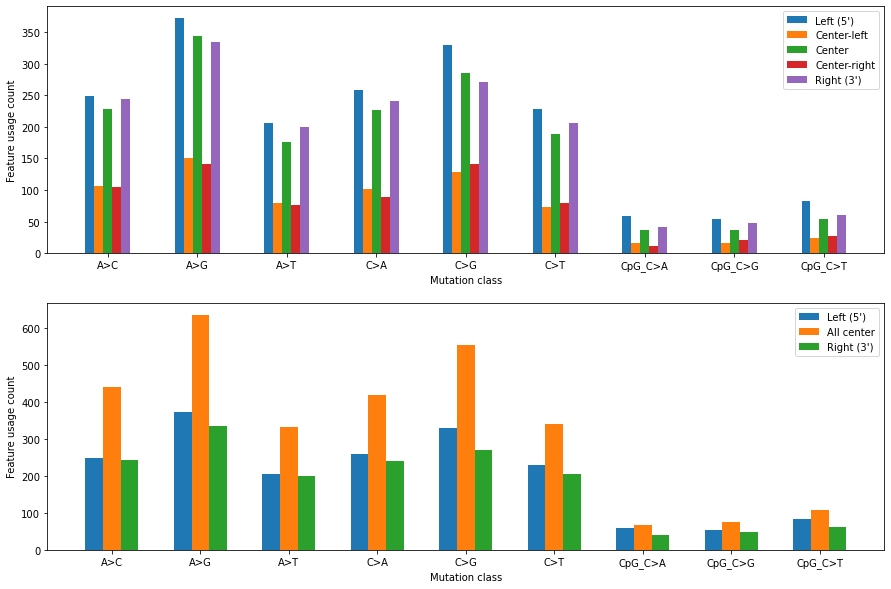

In [43]:
fig_out = plt.figure(figsize=[15, 10])
plt.subplot(211)
for i in range(5):
    plt.bar(x=np.arange(9)+(0.1*i-0.2), height=np.array(Feature_loc_count_df.iloc[i]), width=0.1)
plt.xlabel("Mutation class")
plt.xticks(np.arange(0, 9), Index_class_name)
plt.ylabel("Feature usage count")
plt.legend(["Left (5')", "Center-left", "Center", "Center-right", "Right (3')"])

plt.subplot(212)
for i in [0, 2, 4]:
    if i == 2:
        tmp_height = np.array( np.sum(Feature_loc_count_df.iloc[1:4], axis=0) )
        plt.bar(x=np.arange(9)+(0.1*i-0.2), height=tmp_height, width=0.2)
    else:
        plt.bar(x=np.arange(9)+(0.1*i-0.2), height=np.array(Feature_loc_count_df.iloc[i]), width=0.2)
plt.xlabel("Mutation class")
plt.xticks(np.arange(0, 9), Index_class_name)
plt.ylabel("Feature usage count")
plt.legend(["Left (5')", "All center", "Right (3')"])

fig_out.savefig("manuscript/figures/pltout_x_featurecount_location.pdf", dpi=300)
plt.show()

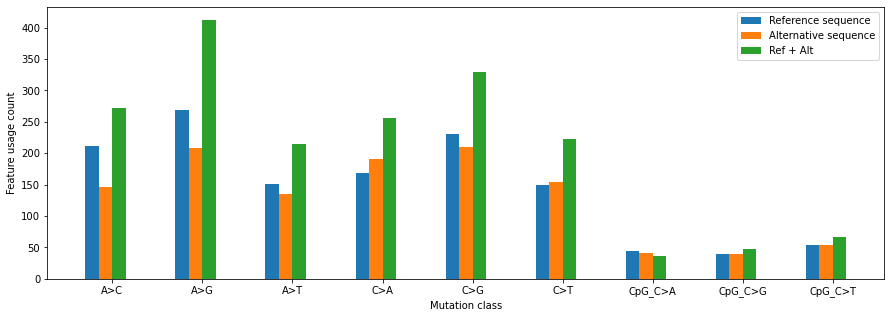

In [44]:
fig_out = fig_out = plt.figure(figsize=[15, 5])
for i in range(3):
    plt.bar(x=np.arange(9)+(0.15*i-0.225), height=np.array(Feature_seq_count_df.iloc[i]), width=0.15)
plt.xlabel("Mutation class")
plt.xticks(np.arange(0, 9), Index_class_name)
plt.ylabel("Feature usage count")
plt.legend(["Reference sequence", "Alternative sequence", "Ref + Alt"])

fig_out.savefig("manuscript/figures/pltout_x_featurecount_sequence.pdf", dpi=300)
plt.show()

Next, look at enrichments in top N% as before. 

In [45]:
Feature_loc_count_n, Feature_seq_count_n = dict(), dict()

for n in [0.05, 0.1, 0.25, 0.5, 0.75]:
    Feature_loc_count_n[n], Feature_seq_count_n[n] = dict(), dict()
    for select in range(9):
        index_counter_c, index_counter_s = dict(), dict()
        for obj in ['L', 'CL', 'C', 'CR', 'R']:
            index_counter_c[obj] = 0
        for obj in ['ref', 'alt', 'ref|alt']:
            index_counter_s[obj] = 0
        for i in range(int(np.sum(DF_final_topcoefs_reorganize[:, select] != 0) * n)):
            item1, item2 = Sorted_index_scoring_loc[select][i], Sorted_index_scoring_seq[select][i]
            if type(item1) == list:
                for obj1 in item1:
                    index_counter_c[obj1] += 1
            else:
                index_counter_c[item1] += 1
            index_counter_s[item2] += 1
        Feature_loc_count_n[n][select], Feature_seq_count_n[n][select] = index_counter_c, index_counter_s
    Feature_loc_count_n[n], Feature_seq_count_n[n] = pd.DataFrame(Feature_loc_count_n[n], dtype=float).fillna(0), \
                                                     pd.DataFrame(Feature_seq_count_n[n], dtype=float).fillna(0)
    display(Feature_loc_count_n[n])
    display(Feature_seq_count_n[n])

,0,1,2,3,4,5,6,7,8
L,11.0,27.0,9.0,11.0,23.0,11.0,1.0,1.0,3.0
CL,8.0,8.0,2.0,7.0,8.0,3.0,2.0,0.0,0.0
C,12.0,8.0,14.0,14.0,9.0,13.0,0.0,2.0,0.0
CR,6.0,11.0,3.0,4.0,7.0,5.0,1.0,1.0,0.0
R,9.0,7.0,13.0,10.0,5.0,6.0,4.0,5.0,5.0


,0,1,2,3,4,5,6,7,8
ref,10.0,8.0,4.0,6.0,11.0,9.0,4.0,2.0,3.0
alt,4.0,13.0,7.0,5.0,13.0,3.0,0.0,3.0,2.0
ref|alt,17.0,23.0,14.0,19.0,14.0,14.0,2.0,1.0,3.0


,0,1,2,3,4,5,6,7,8
L,23.0,45.0,20.0,25.0,44.0,22.0,3.0,3.0,6.0
CL,11.0,16.0,8.0,15.0,15.0,7.0,3.0,2.0,2.0
C,29.0,25.0,25.0,26.0,22.0,26.0,2.0,3.0,3.0
CR,13.0,21.0,8.0,8.0,16.0,9.0,1.0,2.0,2.0
R,19.0,26.0,21.0,19.0,13.0,15.0,7.0,8.0,9.0


,0,1,2,3,4,5,6,7,8
ref,23.0,17.0,9.0,14.0,24.0,18.0,4.0,5.0,6.0
alt,12.0,20.0,13.0,16.0,19.0,8.0,3.0,5.0,4.0
ref|alt,27.0,51.0,28.0,31.0,34.0,26.0,5.0,2.0,7.0


,0,1,2,3,4,5,6,7,8
L,59.0,104.0,52.0,69.0,107.0,49.0,14.0,15.0,18.0
CL,29.0,37.0,19.0,35.0,30.0,19.0,7.0,5.0,6.0
C,67.0,81.0,61.0,64.0,71.0,57.0,6.0,9.0,13.0
CR,27.0,44.0,12.0,18.0,31.0,24.0,3.0,4.0,6.0
R,53.0,69.0,51.0,49.0,40.0,50.0,11.0,11.0,19.0


,0,1,2,3,4,5,6,7,8
ref,52.0,50.0,32.0,39.0,52.0,37.0,8.0,9.0,12.0
alt,41.0,52.0,32.0,46.0,51.0,29.0,11.0,11.0,17.0
ref|alt,64.0,120.0,61.0,69.0,89.0,65.0,11.0,11.0,14.0


,0,1,2,3,4,5,6,7,8
L,121.0,200.0,101.0,138.0,188.0,112.0,26.0,22.0,41.0
CL,57.0,78.0,46.0,58.0,66.0,29.0,11.0,10.0,12.0
C,117.0,181.0,100.0,120.0,141.0,98.0,17.0,13.0,25.0
CR,53.0,75.0,40.0,44.0,68.0,41.0,7.0,16.0,13.0
R,119.0,147.0,97.0,107.0,105.0,107.0,25.0,31.0,32.0


,0,1,2,3,4,5,6,7,8
ref,100.0,108.0,69.0,78.0,105.0,69.0,20.0,22.0,23.0
alt,76.0,107.0,60.0,94.0,98.0,72.0,19.0,20.0,26.0
ref|alt,138.0,229.0,121.0,136.0,182.0,122.0,22.0,21.0,38.0


,0,1,2,3,4,5,6,7,8
L,184.0,290.0,153.0,200.0,258.0,175.0,45.0,36.0,62.0
CL,82.0,118.0,63.0,82.0,101.0,47.0,13.0,13.0,22.0
C,172.0,262.0,142.0,173.0,211.0,143.0,28.0,25.0,43.0
CR,81.0,101.0,57.0,64.0,109.0,62.0,7.0,19.0,21.0
R,177.0,236.0,145.0,171.0,178.0,154.0,34.0,40.0,46.0


,0,1,2,3,4,5,6,7,8
ref,150.0,188.0,107.0,124.0,163.0,112.0,32.0,28.0,40.0
alt,118.0,162.0,93.0,144.0,160.0,110.0,29.0,32.0,35.0
ref|alt,203.0,316.0,175.0,194.0,254.0,173.0,31.0,34.0,56.0


#### Interaction of shape feature usage and location/sequence

Is there a change in shapes used in different locations and on ref\alt alleles? 

In [47]:
Shapes_name = ['HelT', 'Rise', 'Roll', 'Shift', 'Slide', 'Tilt', 'Buckle', 'Opening', 'ProT', 'Shear', 
                     'Stagger', 'Stretch', 'MGW', 'EP']

# Feature location and sequence info
Feature_loc_shape_count = dict()
for select in range(9):
    index_counter = dict()
    for obj in ['L', 'CL', 'C', 'CR', 'R']:
        index_counter[obj] = dict()
        for shape in Shapes_name:
            index_counter[obj][shape] = 0

    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        item1, item2 = Sorted_index_scoring_shape[select][i], Sorted_index_scoring_loc[select][i]
        if type(item1) == list:
            if type(item2) == list:
                for j in range(len(item1)):
                    index_counter[item2[j]][item1[j]] += 1
            else:
                for j in range(len(item1)):
                    index_counter[item2][item1[j]] += 1                
        else:
            if type(item2) == list:
                for j in range(len(item2)):
                    index_counter[item2[j]][item1] += 1                
            else:
                index_counter[item2][item1] += 1
        Feature_loc_shape_count[select] = pd.DataFrame(index_counter)

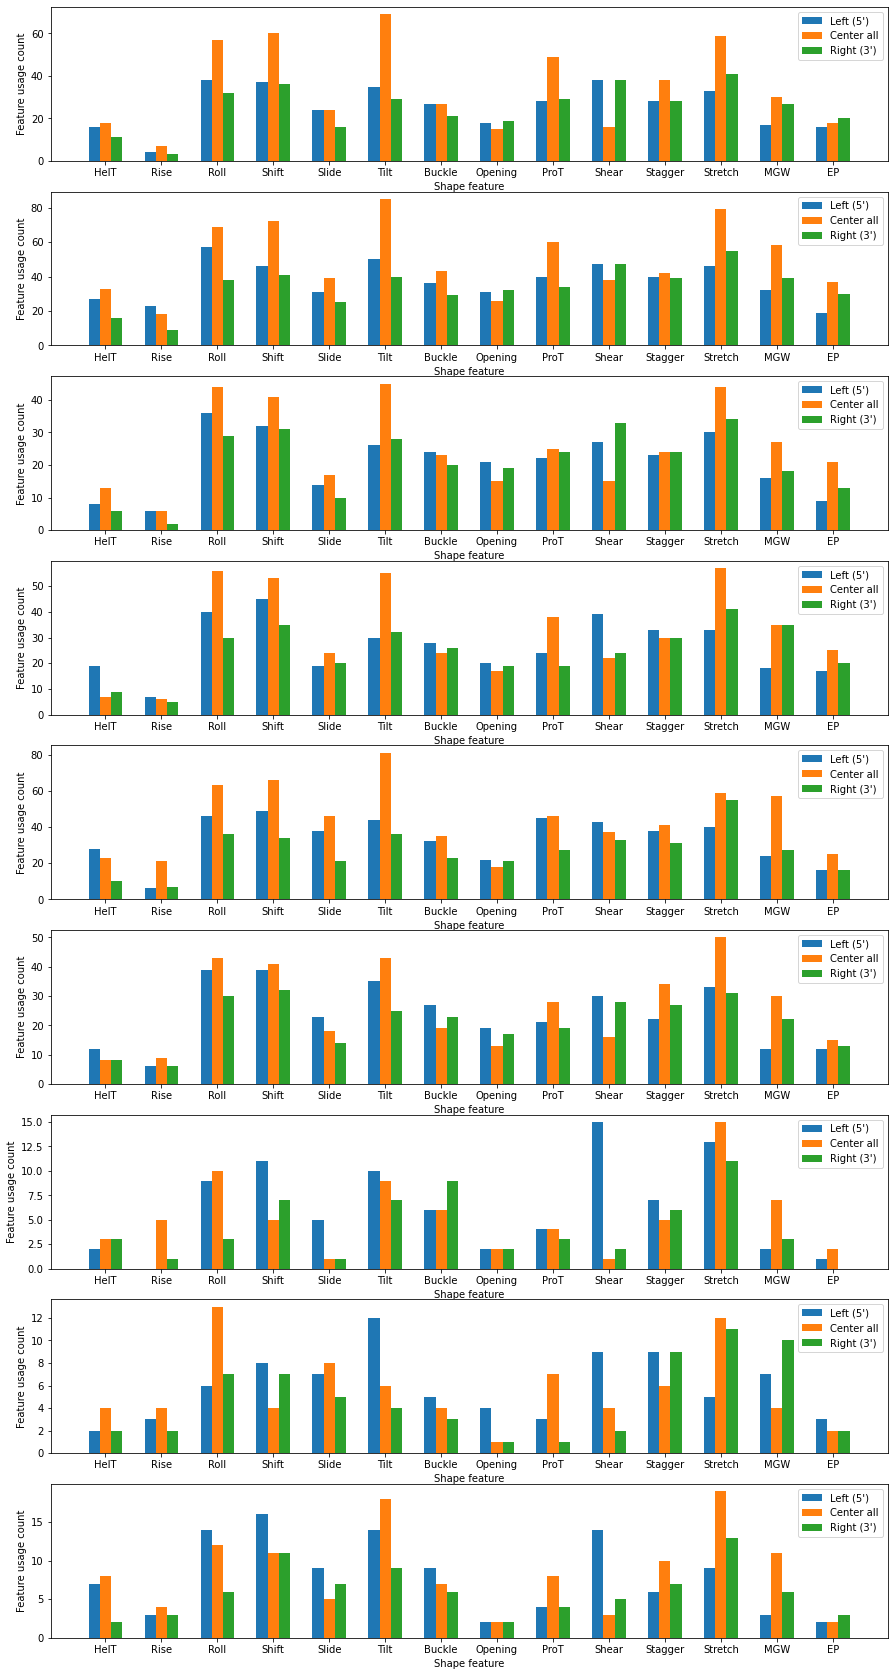

In [48]:
fig_out = fig_out = plt.figure(figsize=[15, 30])
for select in range(9):
    plt.subplot(911+select)
    for i in [0, 2, 4]:
        if i == 2:
            tmp_height = np.array( np.sum(Feature_loc_shape_count[select].iloc[:, 1:4], axis=1) )
            plt.bar(x=np.arange(14)+(0.1*i-0.2), height=tmp_height, width=0.2)
        else:
            tmp_height = np.array(Feature_loc_shape_count[select].iloc[:, i])
            plt.bar(x=np.arange(14)+(0.1*i-0.2), height=tmp_height, width=0.2)
    plt.xlabel("Shape feature")
    plt.xticks(np.arange(0, 14), list(Feature_loc_shape_count[select].index))
    plt.ylabel("Feature usage count")
    plt.legend(["Left (5')", "Center all", "Right (3')"])

fig_out.savefig("manuscript/figures/pltout_x_featurecount_shapexloc.pdf", dpi=300)
plt.show()

In [49]:
# Feature location and sequence info
Feature_seq_shape_count = dict()
for select in range(9):
    index_counter = dict()
    for obj in ['ref', 'alt', 'ref|alt']:
        index_counter[obj] = dict()
        for shape in Shapes_name:
            index_counter[obj][shape] = 0

    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        item1, item2 = Sorted_index_scoring_shape[select][i], Sorted_index_scoring_seq[select][i]
        if type(item1) == list:
            if type(item2) == list:
                for j in range(len(item1)):
                    index_counter[item2[j]][item1[j]] += 1
            else:
                for j in range(len(item1)):
                    index_counter[item2][item1[j]] += 1                
        else:
            if type(item2) == list:
                for j in range(len(item2)):
                    index_counter[item2[j]][item1] += 1                
            else:
                index_counter[item2][item1] += 1
        Feature_seq_shape_count[select] = pd.DataFrame(index_counter)

In [50]:
Feature_seq_shape_count[select]

,ref,alt,ref|alt
HelT,10,1,4
Rise,4,3,2
Roll,11,5,14
Shift,12,9,15
Slide,7,8,5
Tilt,6,8,25
Buckle,10,6,6
Opening,0,3,3
ProT,7,3,5
Shear,5,9,8


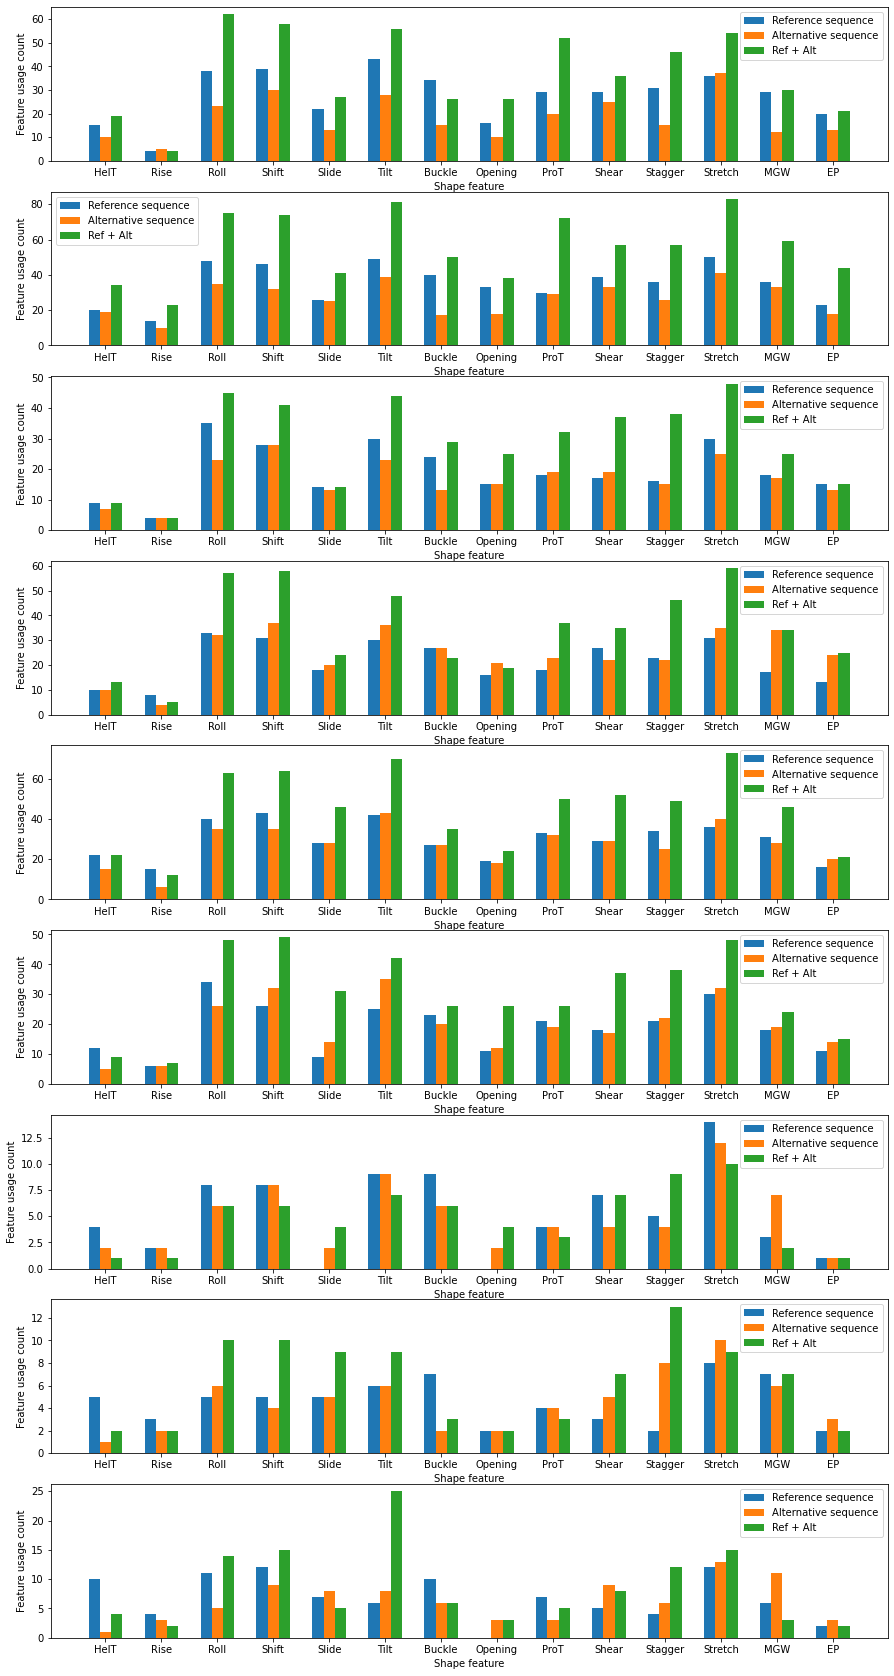

In [51]:
fig_out = fig_out = plt.figure(figsize=[15, 30])
for select in range(9):
    plt.subplot(911+select)
    for i in range(3):
        tmp_height = np.array(Feature_seq_shape_count[select].iloc[:, i])
        plt.bar(x=np.arange(14)+(0.2*i-0.2), height=tmp_height, width=0.2)
    plt.xlabel("Shape feature")
    plt.xticks(np.arange(0, 14), list(Feature_seq_shape_count[select].index))
    plt.ylabel("Feature usage count")
    plt.legend(["Reference sequence", "Alternative sequence", "Ref + Alt"])
    
fig_out.savefig("manuscript/figures/pltout_x_featurecount_shapexsequence.pdf", dpi=300)
plt.show()

Looks like there are not much enrichments in location or sequence usages. However, there seem to be some differences across shape types?

#### Shape interaction enrichment

For our final analysis: are there enrichments of certain shape-interactions?

For shape interactions, we define it as 2nd order features only; there are within-shape interactions, as well as between-shape interactions. 

By random chance, each type of interaction is expected to occur at similar rates.

In [52]:
Feature_occur_intershape = dict()

for select in np.arange(9):
    index_counter = dict()
    for i in range(np.sum(DF_final_topcoefs_reorganize[:, select] != 0)):
        obj = Sorted_index_scoring_shape[select][i]
        if type(obj) == list:
            if obj[0] == obj[1]:
                item = obj[0] + "^2"
            else:
                obj.sort()
                item = obj[0] + "_" + obj[1]
            if item not in index_counter:
                index_counter[item] = 0
            index_counter[item] += 1
    Feature_occur_intershape[select] = pd.DataFrame(index_counter.values(), index=index_counter.keys(), columns=["Count"], dtype=int).fillna(0)

In [53]:
Feature_occur_intershape

{0:                 Count
 HelT_Roll           2
 HelT_Slide          7
 HelT_Shift          3
 EP_ProT             3
 Shear_Slide         5
 ...               ...
 Rise_Stretch        1
 Rise_Shift          1
 Buckle_Stagger      1
 HelT_Shear          1
 HelT_Tilt           1
 
 [84 rows x 1 columns],
 1:                 Count
 MGW_ProT           14
 HelT_Roll           7
 MGW_Stretch        13
 Rise_Roll           4
 Rise_Tilt           5
 ...               ...
 Roll_Tilt          18
 Buckle_Opening      3
 Opening_Shift       6
 Shift_Stagger      12
 Buckle_Stagger      1
 
 [90 rows x 1 columns],
 2:                 Count
 HelT_Shift          3
 ProT_Stretch        9
 Rise_Shift          1
 EP_ProT             3
 EP_Slide            3
 ...               ...
 HelT_ProT           3
 Buckle_Opening      1
 Shear_Stagger       4
 Buckle_Stagger      1
 Slide_Stretch       1
 
 [76 rows x 1 columns],
 3:                  Count
 Rise_Shear           4
 Slide_Stretch        4
 Buckle_EP

In [54]:
Feature_occur_intershape_bin = dict()

for select in np.arange(9):
    Feature_occur_intershape_bin[select] = dict()
    rangeint = np.sum(DF_final_topcoefs_reorganize[:, select] != 0)
    for j in np.arange(10):
        n_low = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0][j+1]
        n_high = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0][j]
        index_counter = dict()
        for i in np.arange(int(rangeint*n_low), int(rangeint*n_high)):
            obj = Sorted_index_scoring_shape[select][i]
            if type(obj) == list:
                if obj[0] == obj[1]:
                    item = obj[0] + "^2"
                else:
                    obj.sort()
                    item = obj[0] + "_" + obj[1]
                if item not in index_counter:
                    index_counter[item] = 0
                index_counter[item] += 1
        Feature_occur_intershape_bin[select][j] = Counter(index_counter)
    Feature_occur_intershape_bin[select] = pd.DataFrame(Feature_occur_intershape_bin[select], dtype=int).fillna(0)

<ipython-input-54-4e2a6bcc5bbe>:22: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  Feature_occur_intershape_bin[select] = pd.DataFrame(Feature_occur_intershape_bin[select], dtype=int).fillna(0)


In [55]:
Feature_occur_intershape_bin

{0:                  0    1    2    3    4    5    6    7    8    9
 Roll_Stretch   1.0  3.0  2.0  0.0  0.0  2.0  2.0  1.0  2.0  0.0
 Shift_Tilt     2.0  2.0  2.0  3.0  3.0  2.0  4.0  1.0  0.0  0.0
 Stagger_Tilt   2.0  0.0  0.0  2.0  2.0  2.0  0.0  1.0  2.0  0.0
 ProT_Stretch   3.0  1.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  1.0
 Shear_Stagger  2.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0
 ...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 Buckle_EP      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0
 Slide_Stagger  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0
 HelT_Roll      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0
 HelT_Stretch   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0
 Buckle_Rise    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 
 [84 rows x 10 columns],
 1:                    0    1    2    3    4    5    6    7    8    9
 ProT_Stretch     1.0  0.0  0.0  2.0  2.0  3.0  0.0  3.0  2.0  0.0
 Stagger_Stretch  2.0  2.0  2.0  4.0  1.0  1.0  1.0  

This concludes this part of the notebook. Next, run the decision tree models.